# **Introduction to Data Science**
# **DS-2001**
# Project


Solution designed by:

Muddassir Asghar - i23-2577

M. Abdullah Ali - i23-2523

Introduction:
Imtiaz Mall, a renowned department store chain, is experiencing declining sales and a significant
number of non-recurring customers in its electronics section. To address this challenge, you, the
newly appointed Senior Data Scientist, have been tasked with conducting a comprehensive
analysis of the electronics section data and developing data-driven strategies for customer
retention and sales growth. This project focuses on the initial steps of this analysis, specifically
exploring the data through various techniques.

Before we begin, necessary libraries are imported

## **Program prerequisites**

In [5]:
# import ur libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **Module 1: Data Acquisition and Preprocessing:**

### 1. Data Loading:

The data specific to the project requirements is loaded into the program.

In [9]:
df = pd.read_json('electronics.json')
df.head(10)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter,1
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall,1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter,1
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall,1
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer,1
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,08,1989,Spring,1
6,e67f67b2-12f2-4b0c-b027-19cb052b3dd8,,Female,,"166 Johnny Mount Suite 366\nKimberlyberg, KS 6...",878c7ab1-ec62-4fc5-9061-6bed5db334f6,2021-12-22,8f399675-5c05-4bef-b5d1-863ec387e70a,Clothing,Brand_C,441,41,6,9,Medium,04,1973,Fall,1
7,80a5d367-b3dc-4c18-8a93-584e7c5e7e29,23,Female,High,"203 Tiffany Hill Suite 971\nPort Josetown, VI ...",e88c395b-2e4e-4d97-bbdb-0cc321168753,2022-09-30,f2f4088c-8822-4532-8b4d-ae4ed9ff2e1c,Clothing,Brand_A,390,42,9,2,Low,04,1976,Winter,1
8,,22,Male,Low,"76417 Johnson Flat Suite 425\nCrystalchester, ...",cdae113e-9cb5-4a30-92f9-2c5637044d2a,2023-08-19,06bd8738-5110-49bd-abeb-1abdb3ce7f6b,,Brand_C,297,49,4,5,Low,11,2018,Fall,1
9,a9dc9153-9750-471a-8a90-7c46292fc34c,80,Female,High,Unit 3169 Box 6845\nDPO AA 27380,24577c38-d74b-41a3-a944-2d32510b842b,2020-07-20,ee4c9e6c-801d-425d-ae12-589570ab3a66,Books,Brand_A,84,61,2,7,High,09,,Fall,1


In [10]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Will_Purchase_Next_Month'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   object
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   object
 11  Average_Spending_Per_Purchase  1000 non-null   object
 12  Purchase_Frequency_Per_Month   1000 non-null   object
 13  Bran

In [12]:
int_columns = [
    "Age",
    "Purchase_Amount",
    "Average_Spending_Per_Purchase",
    "Purchase_Frequency_Per_Month",
    "Brand_Affinity_Score",
    "Month",
    "Year",
]

for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

df = df.replace('', np.nan)
df = df.replace('Hidden', np.nan)

df["Will_Purchase_Next_Month"] = df["Will_Purchase_Next_Month"].astype(bool)

def convert_to_days(date):
    if isinstance(date, str) and date != "Hidden":
        try:
            return datetime.strptime(date, "%Y-%m-%d").toordinal()
        except ValueError:
            return None 
    return None 

# Ensure the "Purchase_Date" column is clean before applying the function
df["Days"] = df["Purchase_Date"].apply(convert_to_days).astype("Int64")
int_columns.append('Days')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    956 non-null    object
 1   Age                            960 non-null    Int64 
 2   Gender                         952 non-null    object
 3   Income_Level                   950 non-null    object
 4   Address                        953 non-null    object
 5   Transaction_ID                 950 non-null    object
 6   Purchase_Date                  952 non-null    object
 7   Product_ID                     951 non-null    object
 8   Product_Category               940 non-null    object
 9   Brand                          942 non-null    object
 10  Purchase_Amount                951 non-null    Int64 
 11  Average_Spending_Per_Purchase  960 non-null    Int64 
 12  Purchase_Frequency_Per_Month   945 non-null    Int64 
 13  Bran

In [13]:
df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Days
count,960.0,951.0,960.0,945.0,939.0,947.0,948.0,952.0
mean,49.885417,250.629863,51.603125,5.437037,5.369542,6.564942,1997.0,738148.856092
std,18.482283,141.017012,27.104859,2.845325,2.843608,3.442791,15.509714,414.53734
min,18.0,10.0,5.0,1.0,1.0,1.0,1970.0,737426.0
25%,34.0,132.0,29.0,3.0,3.0,4.0,1984.0,737786.75
50%,50.0,246.0,50.0,5.0,5.0,6.0,1997.0,738167.0
75%,66.0,376.0,74.0,8.0,8.0,10.0,2011.0,738500.5
max,80.0,500.0,100.0,10.0,10.0,12.0,2023.0,738855.0


In [14]:
df.describe(include="object")

,Customer_ID,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Product_Category_Preferences,Season
count,956,952,950,953,950,952,951,940,942,957,952
unique,956,3,3,953,950,698,951,3,3,3,4
top,b81ee6c9-2ae4-48a7-b283-220eaa244f43,Other,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2023-03-01,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Electronics,Brand_C,Low,Fall
freq,1,334,345,1,1,5,1,355,342,334,246


### 2. Data Cleaning:

o Identify and handle missing values using appropriate techniques like
mean/median imputation or dropping rows/columns with excessive missingness.

In [17]:
df.isnull().sum()

Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
Will_Purchase_Next_Month          0
Days                             48
dtype: int64

In [18]:
df.isnull().any(axis=1).sum()

606

In [19]:
df.head(10)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter,True,738271
1,NaN,25,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,8,1989,Fall,True,738012
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,<NA>,1995,Winter,True,738133
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall,True,738492
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,1,2010,Summer,True,737584
5,5a4ac4ce-1e09-4ecb-805c-fb676f101385,26,Other,High,"843 John Knoll Suite 876\nRodriguezmouth, MO 3...",5b0d927b-a342-4df1-8846-a1acc62e2842,2022-12-03,03f82332-801c-45e2-84bf-af10a8f60248,Books,Brand_A,57,21,2,6,High,8,1989,Spring,True,738492
6,e67f67b2-12f2-4b0c-b027-19cb052b3dd8,<NA>,Female,NaN,"166 Johnny Mount Suite 366\nKimberlyberg, KS 6...",878c7ab1-ec62-4fc5-9061-6bed5db334f6,2021-12-22,8f399675-5c05-4bef-b5d1-863ec387e70a,Clothing,Brand_C,441,41,6,9,Medium,4,1973,Fall,True,738146
7,80a5d367-b3dc-4c18-8a93-584e7c5e7e29,23,Female,High,"203 Tiffany Hill Suite 971\nPort Josetown, VI ...",e88c395b-2e4e-4d97-bbdb-0cc321168753,2022-09-30,f2f4088c-8822-4532-8b4d-ae4ed9ff2e1c,Clothing,Brand_A,390,42,9,2,Low,4,1976,Winter,True,738428
8,NaN,22,Male,Low,"76417 Johnson Flat Suite 425\nCrystalchester, ...",cdae113e-9cb5-4a30-92f9-2c5637044d2a,2023-08-19,06bd8738-5110-49bd-abeb-1abdb3ce7f6b,NaN,Brand_C,297,49,4,5,Low,11,2018,Fall,True,738751
9,a9dc9153-9750-471a-8a90-7c46292fc34c,80,Female,High,Unit 3169 Box 6845\nDPO AA 27380,24577c38-d74b-41a3-a944-2d32510b842b,2020-07-20,ee4c9e6c-801d-425d-ae12-589570ab3a66,Books,Brand_A,84,61,2,7,High,9,<NA>,Fall,True,737626


In [20]:
def int_cols_plot(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(16, 6))
        
        # Plot 1: Histogram with KDE
        plt.subplot(1, 3, 1)
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue', alpha=0.6)
        plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {df[column].mean():.2f}")
        plt.axvline(df[column].median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {df[column].median():.2f}")
        plt.title(f"Distribution of {column}")
        plt.legend()
        
        # Plot 2: Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column], color='orange')
        plt.title(f"Boxplot of {column}")
        
        plt.tight_layout()
        plt.show()

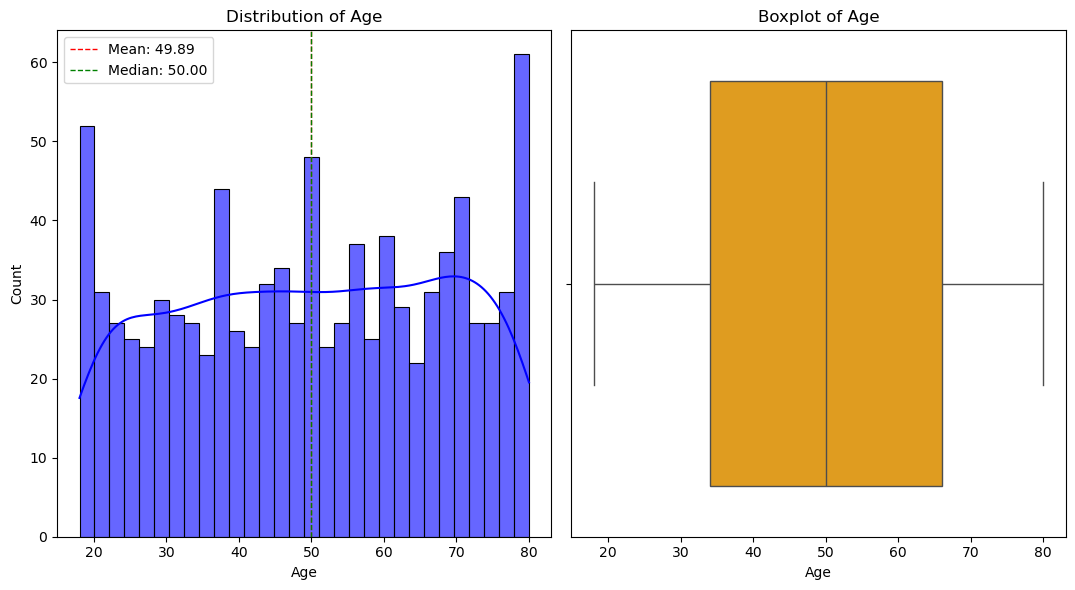

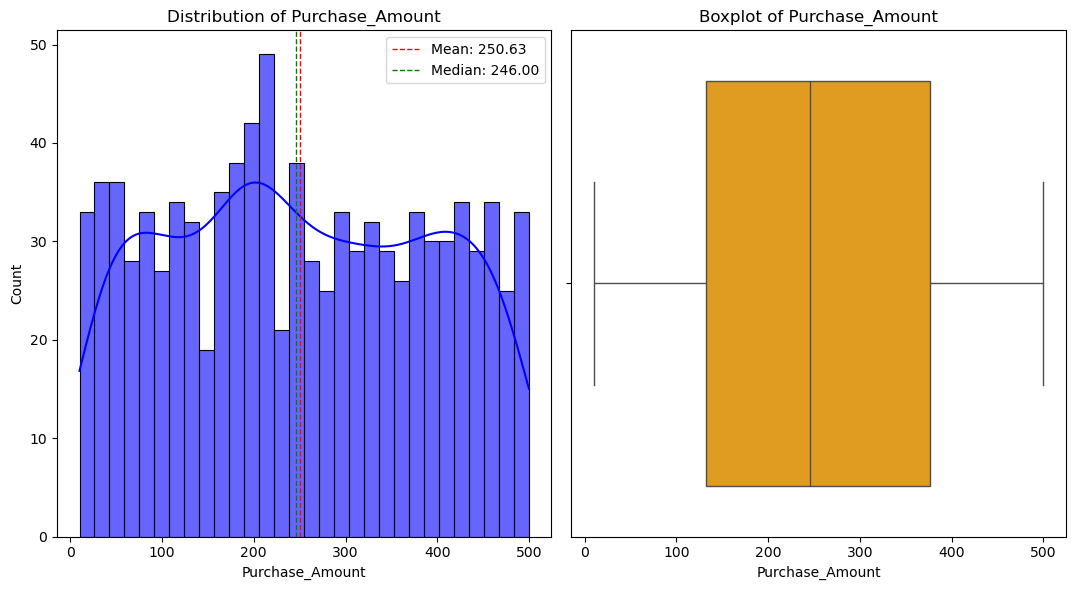

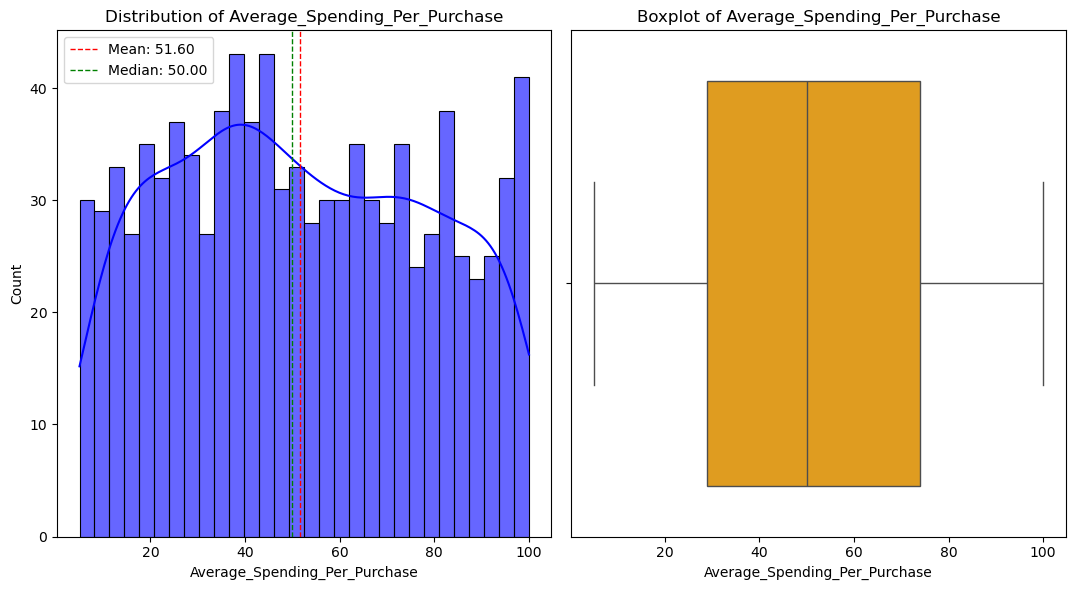

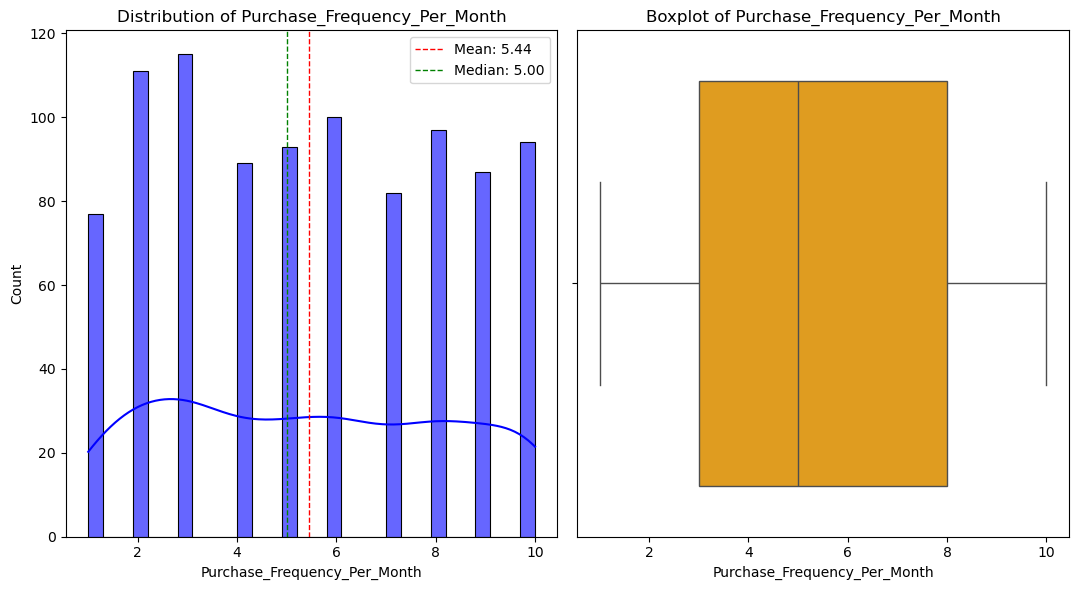

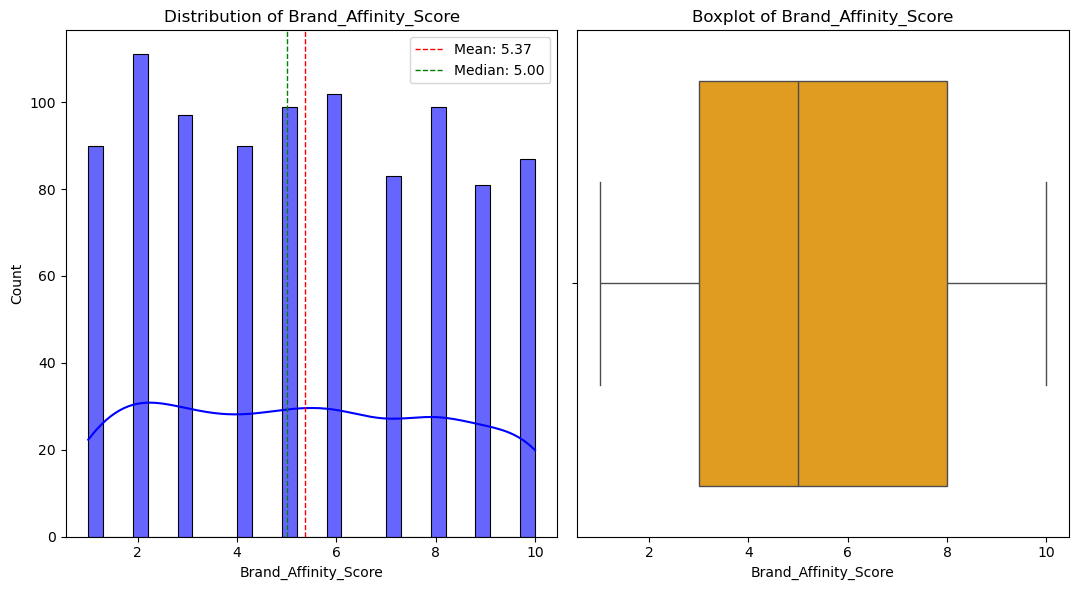

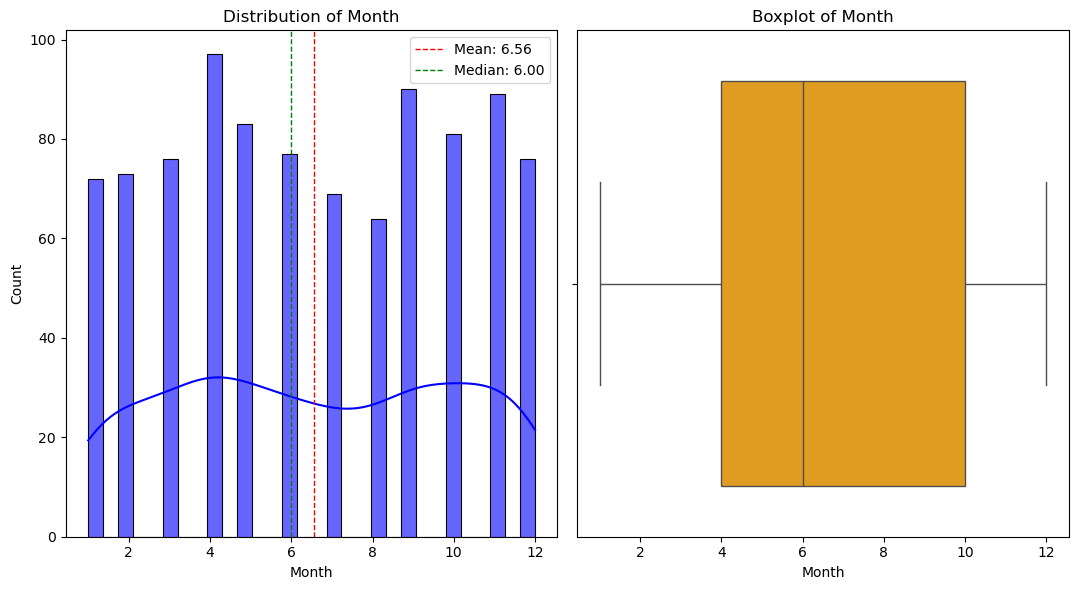

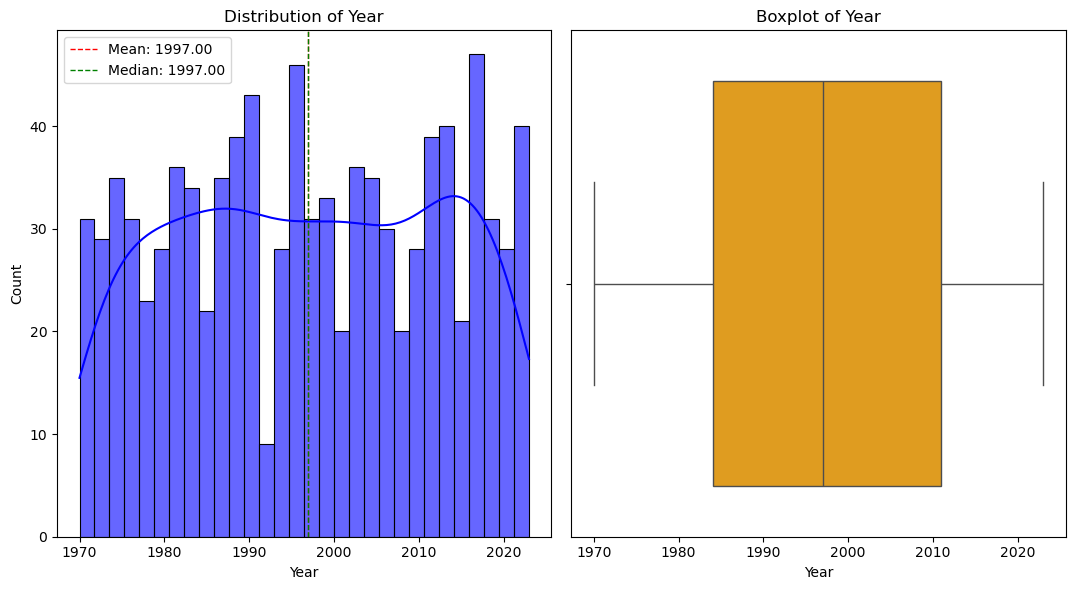

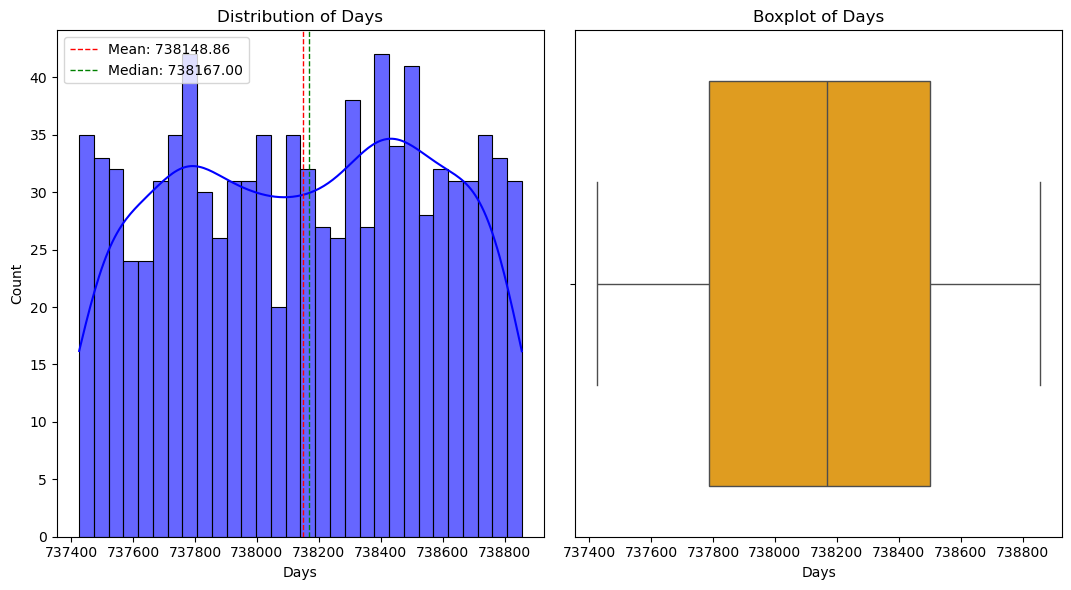

In [21]:
int_cols_plot(df, int_columns)

In [22]:
# # Removing NaN values from Integer columns
mean_impute_columns = [
    "Age", "Purchase_Frequency_Per_Month", "Brand_Affinity_Score", "Days"
]

median_impute_columns = [
    "Purchase_Amount", "Average_Spending_Per_Purchase"
]

log_transform_columns = [
    "Average_Spending_Per_Purchase"
]

for col in mean_impute_columns:
    mean = int(df[col].mean())
    df[col] = df[col].fillna(mean)

for col in median_impute_columns:
    median = int(df[col].median())
    df[col] = df[col].fillna(median)

In [23]:
# Handling missing values in Categorical columns by replacing NaN values with mode
categorical_columns = ['Gender', 'Income_Level', 'Brand', 'Product_Category_Preferences']

for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].apply(lambda x: mode_value if pd.isna(x) or x == "Hidden" else x)

def fill_purchase_date(row):
    if pd.isna(row["Purchase_Date"]) or row["Purchase_Date"] == "Hidden":
        mode_date = df["Purchase_Date"].dropna()[df["Purchase_Date"] != "Hidden"].mode()[0]  # Mode of non-hidden, non-null dates
        return mode_date
    return row["Purchase_Date"]  # Keep original value if valid

# Apply the function to fill missing values in 'Purchase_Date'
df["Purchase_Date"] = df.apply(fill_purchase_date, axis=1)

In [24]:
columns_to_drop = ['Customer_ID', 'Address', 'Transaction_ID', 'Product_ID']
df.drop(columns=columns_to_drop, inplace=True)

# Purchase_Date_Column = df.drop(['Purchase_Date'], axis=1)
# df = df.drop(['Purchase_Date'], axis=1)

In [25]:
# Mapping months to seasons
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
}

# Mode of the 'Season' column
mode_season = df['Season'].mode()[0]

# Handle NaN or 'Hidden' values in 'Season' column
df['Season'] = df['Season'].replace(['Hidden', np.nan], None)  # Replace 'Hidden' and NaN with None for consistency
df['Season'] = df.apply(
    lambda row: row['Season'] if row['Season'] is not None else (
        month_to_season.get(row['Month'], mode_season) if pd.notnull(row['Month']) else mode_season
    ),
    axis=1
)

# Handling NaN or 'Hidden' in 'Month' column using the season-to-month mapping
season_to_month = {
    'Winter': 1,  # Default to January for Winter
    'Spring': 4,  # Default to April for Spring
    'Summer': 7,  # Default to July for Summer
    'Fall': 10    # Default to October for Fall
}

df['Month'] = df['Month'].replace(['Hidden', np.nan], None)  # Replace 'Hidden' and NaN with None
df['Month'] = df.apply(
    lambda row: row['Month'] if row['Month'] is not None else season_to_month.get(row['Season'], None),
    axis=1
)

# Convert 'Month' to integer, handling missing values gracefully
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').astype('Int64')

# Handling NaN or 'Hidden' in 'Year' column by replacing them with the mode
year_mode = df['Year'].mode()[0]
df['Year'] = df['Year'].replace(['Hidden', np.nan], year_mode)

# Check if any NaN values remain in 'Year' and 'Month' columns
print(df[['Year', 'Month']].isnull().sum())


Year     0
Month    0
dtype: int64


In [26]:
df['Month'].isnull().sum()

0

In [27]:
df.head(10)

,Age,Gender,Income_Level,Purchase_Date,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
0,40,Female,Medium,2022-04-26,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter,True,738271
1,25,Male,High,2021-08-10,Books,Brand_A,318,77,2,1,Low,8,1989,Fall,True,738012
2,57,Other,Low,2021-12-09,Electronics,Brand_A,197,100,9,1,Low,1,1995,Winter,True,738133
3,38,Female,Medium,2022-12-03,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall,True,738492
4,68,Other,Medium,2020-06-08,Books,Brand_B,429,85,7,2,High,1,2010,Summer,True,737584
5,26,Other,High,2022-12-03,Books,Brand_A,57,21,2,6,High,8,1989,Spring,True,738492
6,49,Female,Medium,2021-12-22,Clothing,Brand_C,441,41,6,9,Medium,4,1973,Fall,True,738146
7,23,Female,High,2022-09-30,Clothing,Brand_A,390,42,9,2,Low,4,1976,Winter,True,738428
8,22,Male,Low,2023-08-19,NaN,Brand_C,297,49,4,5,Low,11,2018,Fall,True,738751
9,80,Female,High,2020-07-20,Books,Brand_A,84,61,2,7,High,9,1995,Fall,True,737626


In [28]:
df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Days
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,49.85,250.403,51.539,5.413,5.347,6.489,1996.896,738148.815
std,18.109319,137.518791,26.558536,2.767687,2.756844,3.453376,15.107197,404.455938
min,18.0,10.0,5.0,1.0,1.0,1.0,1970.0,737426.0
25%,35.0,137.0,30.0,3.0,3.0,4.0,1985.0,737799.0
50%,49.0,246.0,50.0,5.0,5.0,6.0,1995.0,738148.0
75%,66.0,369.0,73.25,8.0,8.0,10.0,2010.0,738491.0
max,80.0,500.0,100.0,10.0,10.0,12.0,2023.0,738855.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   Int64 
 1   Gender                         1000 non-null   object
 2   Income_Level                   1000 non-null   object
 3   Purchase_Date                  1000 non-null   object
 4   Product_Category               940 non-null    object
 5   Brand                          1000 non-null   object
 6   Purchase_Amount                1000 non-null   Int64 
 7   Average_Spending_Per_Purchase  1000 non-null   Int64 
 8   Purchase_Frequency_Per_Month   1000 non-null   Int64 
 9   Brand_Affinity_Score           1000 non-null   Int64 
 10  Product_Category_Preferences   1000 non-null   object
 11  Month                          1000 non-null   Int64 
 12  Year                           1000 non-null   Int64 
 13  Seas

o Analyze outliers and determine whether to retain or remove them based on their
impact on the analysis.

In [31]:
def remove_outliers(df, columns):
    outliers = {}
    for column in columns:

        if df[column].dtype in ['object', 'bool']:
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

c = df.columns
df = remove_outliers(df, c[:-1])
df

,Age,Gender,Income_Level,Purchase_Date,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
0,40,Female,Medium,2022-04-26,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter,True,738271
1,25,Male,High,2021-08-10,Books,Brand_A,318,77,2,1,Low,8,1989,Fall,True,738012
2,57,Other,Low,2021-12-09,Electronics,Brand_A,197,100,9,1,Low,1,1995,Winter,True,738133
3,38,Female,Medium,2022-12-03,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall,True,738492
4,68,Other,Medium,2020-06-08,Books,Brand_B,429,85,7,2,High,1,2010,Summer,True,737584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,Male,Medium,2023-03-17,Electronics,Brand_C,180,92,2,5,Medium,5,1987,Fall,True,738596
996,78,Female,Low,2023-08-30,Books,Brand_B,176,53,3,3,Medium,9,1977,Winter,True,738762
997,63,Male,High,2023-03-01,NaN,Brand_C,212,99,2,9,Low,12,1995,Summer,True,738148
998,43,Male,High,2021-05-13,Clothing,Brand_C,246,98,8,7,Low,3,2000,Spring,True,737923


o Address inconsistencies in data format and encoding.

In [33]:
categorical_columns = ['Gender', 'Income_Level', 'Brand', 'Product_Category_Preferences', 'Season']

for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)



# Columns to drop based on the first unique values
columns_to_drop = {
    'Gender': 'Other',
    'Income_Level': 'Low',
    'Brand': 'Brand_A',
    'Product_Category_Preferences': 'Low',
    'Season': 'Winter'
}

# Drop the first dummy column for each categorical variable
for col, first_value in columns_to_drop.items():
    col_to_drop = f"{col}_{first_value}"  # Construct the column name to drop
    if col_to_drop in df_encoded.columns:
        df_encoded = df_encoded.drop(columns=[col_to_drop])

df_encoded[df_encoded.columns[df_encoded.dtypes == 'bool']] = df_encoded[df_encoded.columns[df_encoded.dtypes == 'bool']].astype('int64')

# Show the columns after dropping
print(df_encoded.columns)

Gender: ['Female' 'Male' 'Other']
Income_Level: ['Medium' 'High' 'Low']
Brand: ['Brand_C' 'Brand_A' 'Brand_B']
Product_Category_Preferences: ['Low' 'High' 'Medium']
Season: ['Winter' 'Fall' 'Summer' 'Spring']
Index(['Age', 'Purchase_Date', 'Product_Category', 'Purchase_Amount',
       'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month',
       'Brand_Affinity_Score', 'Month', 'Year', 'Will_Purchase_Next_Month',
       'Days', 'Gender_Female', 'Gender_Male', 'Income_Level_High',
       'Income_Level_Medium', 'Brand_Brand_B', 'Brand_Brand_C',
       'Product_Category_Preferences_High',
       'Product_Category_Preferences_Medium', 'Season_Fall', 'Season_Spring',
       'Season_Summer'],
      dtype='object')


In [34]:
# # Encoding Non-Numerical data by mapping them via a dictionary
# genders = df['Gender'].unique()
# gender_map = {gender: idx for idx, gender in enumerate(genders)}
# df['Gender'] = df['Gender'].map(gender_map)

# income = df['Income_Level'].unique()
# income_map = {inc: idx for idx, inc in enumerate(income)}
# df['Income_Level'] = df['Income_Level'].map(income_map)

# # prod_cat = df['Product_Category'].unique()
# # prod_cat_map = {prod: idx for idx, prod in enumerate(prod_cat)}
# # df['Product_Category'] = df['Product_Category'].map(prod_cat_map)

# brands = df['Brand'].unique()
# brand_map = {brand: idx for idx, brand in enumerate(brands)}
# df['Brand'] = df['Brand'].map(brand_map)

# prod_cat_pref = df['Product_Category_Preferences'].unique()
# prod_cat_pref_map = {prod_cat_pref: idx for idx, prod_cat_pref in enumerate(prod_cat_pref)}
# df['Product_Category_Preferences'] = df['Product_Category_Preferences'].map(prod_cat_pref_map)

# seasons = df['Season'].unique()
# season_map = {season: idx for idx, season in enumerate(seasons)}
# df['Season'] = df['Season'].map(season_map)

# df_encoded = df.copy()

# print(df[['Gender', 'Income_Level', 'Brand', 'Product_Category_Preferences', 'Season']])

In [35]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  1000 non-null   Int64 
 1   Purchase_Date                        1000 non-null   object
 2   Product_Category                     940 non-null    object
 3   Purchase_Amount                      1000 non-null   Int64 
 4   Average_Spending_Per_Purchase        1000 non-null   Int64 
 5   Purchase_Frequency_Per_Month         1000 non-null   Int64 
 6   Brand_Affinity_Score                 1000 non-null   Int64 
 7   Month                                1000 non-null   Int64 
 8   Year                                 1000 non-null   Int64 
 9   Will_Purchase_Next_Month             1000 non-null   int64 
 10  Days                                 1000 non-null   Int64 
 11  Gender_Female                        1000 no

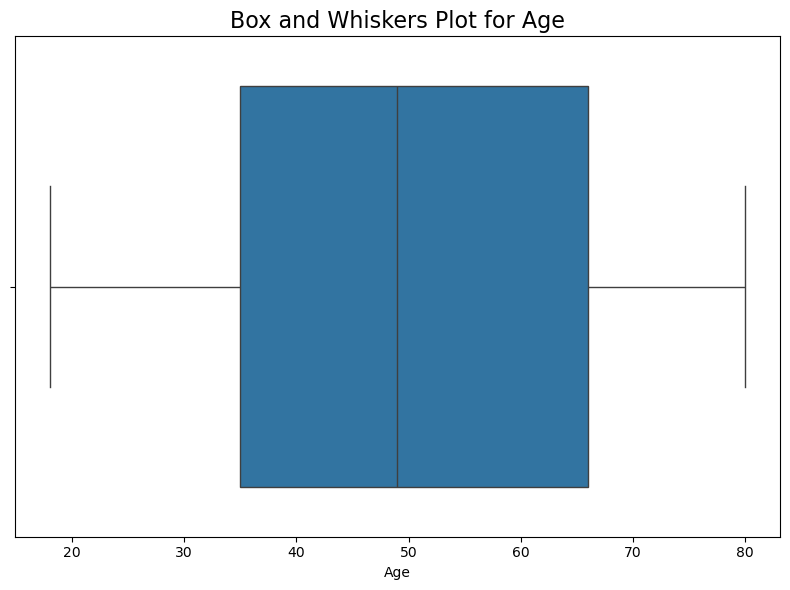

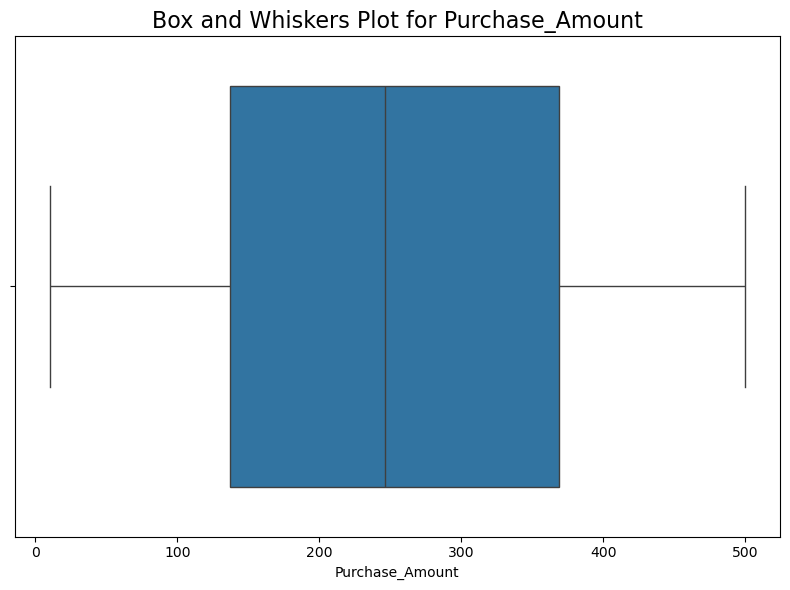

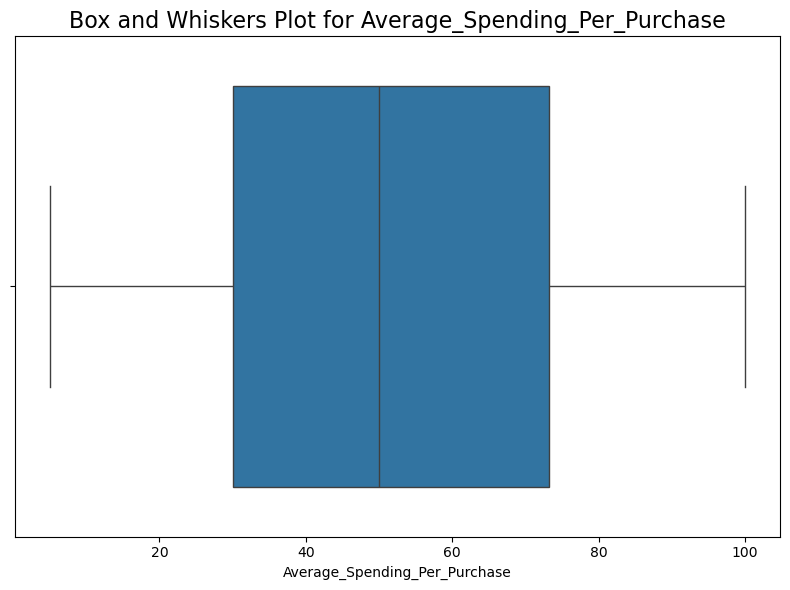

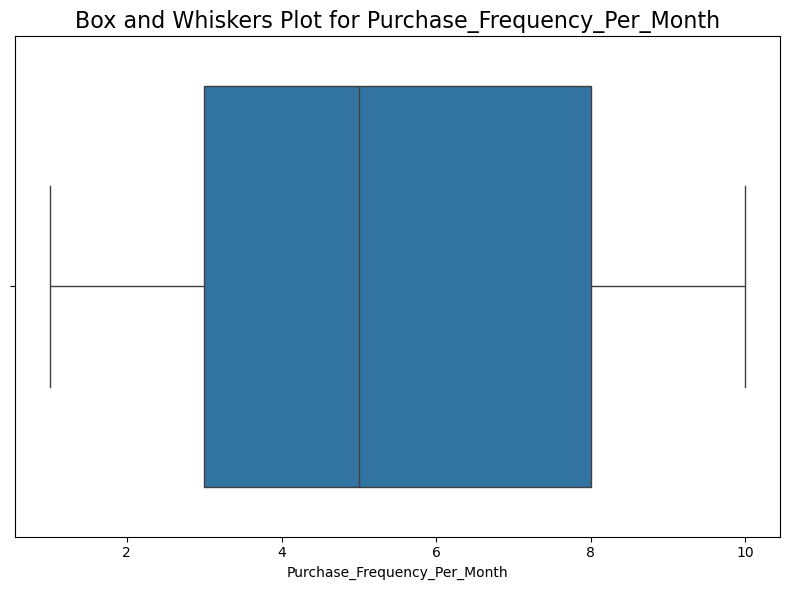

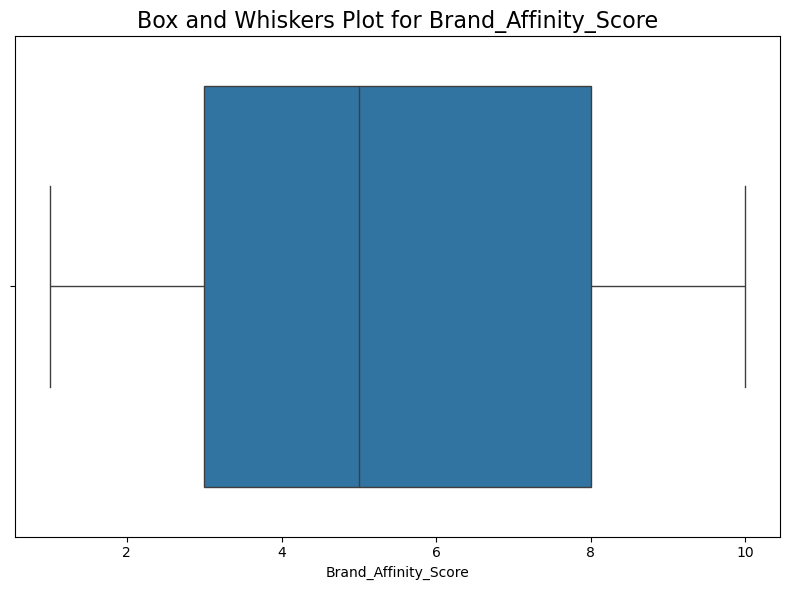

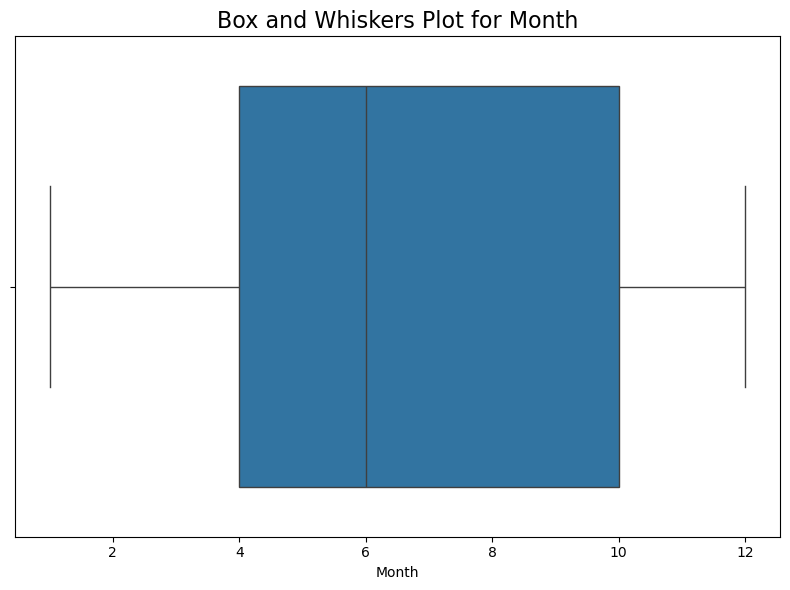

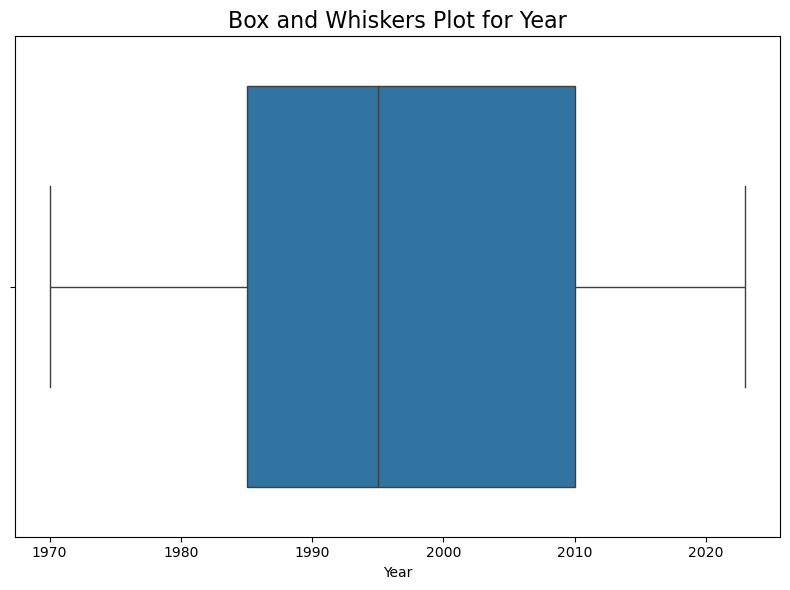

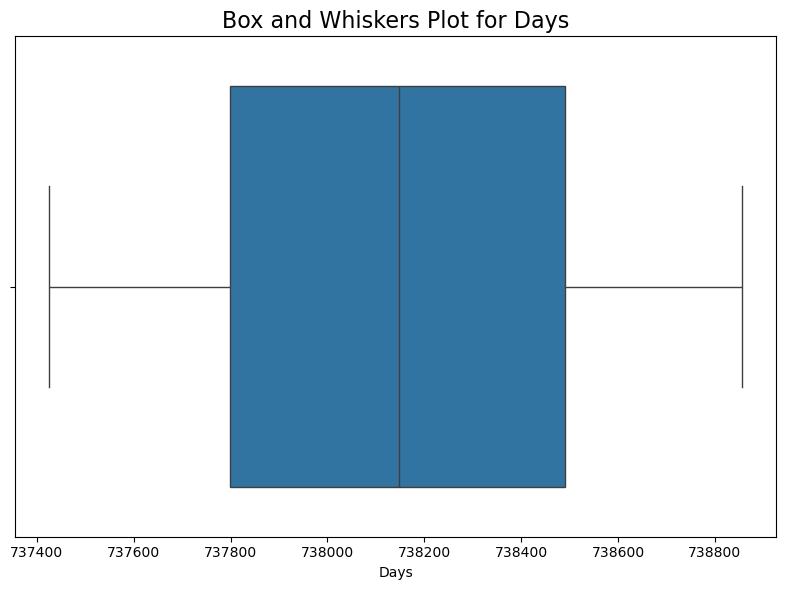

In [36]:
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box and Whiskers Plot for {column}", fontsize=16)
    plt.tight_layout()
    plt.show()



In [37]:
df.head()

,Age,Gender,Income_Level,Purchase_Date,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month,Days
0,40,Female,Medium,2022-04-26,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter,True,738271
1,25,Male,High,2021-08-10,Books,Brand_A,318,77,2,1,Low,8,1989,Fall,True,738012
2,57,Other,Low,2021-12-09,Electronics,Brand_A,197,100,9,1,Low,1,1995,Winter,True,738133
3,38,Female,Medium,2022-12-03,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall,True,738492
4,68,Other,Medium,2020-06-08,Books,Brand_B,429,85,7,2,High,1,2010,Summer,True,737584


### 3. Data Transformation:

o Create new features that provide deeper insights into customer behavior, such
as:

▪ Average spending per purchase

In [41]:
df_encoded

,Age,Purchase_Date,Product_Category,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,...,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
0,40,2022-04-26,Clothing,193,59,2,2,1,2010,1,...,0,0,1,0,1,0,0,0,0,0
1,25,2021-08-10,Books,318,77,2,1,8,1989,1,...,1,1,0,0,0,0,0,1,0,0
2,57,2021-12-09,Electronics,197,100,9,1,1,1995,1,...,0,0,0,0,0,0,0,0,0,0
3,38,2022-12-03,Clothing,262,97,3,4,9,2012,1,...,0,0,1,0,1,0,0,1,0,0
4,68,2020-06-08,Books,429,85,7,2,1,2010,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,2023-03-17,Electronics,180,92,2,5,5,1987,1,...,1,0,1,0,1,0,1,1,0,0
996,78,2023-08-30,Books,176,53,3,3,9,1977,1,...,0,0,0,1,0,0,1,0,0,0
997,63,2023-03-01,NaN,212,99,2,9,12,1995,1,...,1,1,0,0,1,0,0,0,0,1
998,43,2021-05-13,Clothing,246,98,8,7,3,2000,1,...,1,1,0,0,1,0,0,0,1,0


▪ Purchase frequency per month

▪ Brand affinity score (based on product brand preferences)

▪ Product category preferences (e.g., TVs, smartphones, laptops)

o Standardize or normalize numeric features to ensure they contribute equally to
the given algorithms.

In [101]:
columns_to_standardize = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year',
                       'Days']

columns_to_standardize = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

Scaled_df = df_encoded.copy()
Scaled_df[columns_to_standardize] = scaler.fit_transform(Scaled_df[columns_to_standardize])

KMeans_df = Scaled_df.copy()
MLRM_df = Scaled_df.copy()

# MLRM_df = df_encoded.copy()

Scaled_df

,Age,Purchase_Date,Product_Category,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,...,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
0,-0.544191,2022-04-26,Clothing,-0.417628,0.281067,-1.233777,-1.214677,-1.590255,0.867835,0.389966,...,-0.654654,-0.654654,1.237597,-0.673415,1.224745,-0.668714,-0.676554,-0.594289,-0.578890,-0.571192
1,-1.372908,2021-08-10,Books,0.491793,0.959155,-1.233777,-1.577592,0.437762,-0.522926,0.389966,...,1.527525,1.527525,-0.808018,-0.673415,-0.816497,-0.668714,-0.676554,1.682682,-0.578890,-0.571192
2,0.395022,2021-12-09,Electronics,-0.388527,1.825599,1.296677,-1.577592,-1.590255,-0.125566,0.389966,...,-0.654654,-0.654654,-0.808018,-0.673415,-0.816497,-0.668714,-0.676554,-0.594289,-0.578890,-0.571192
3,-0.654687,2022-12-03,Clothing,0.084372,1.712585,-0.872283,-0.488847,0.727478,1.000289,0.389966,...,-0.654654,-0.654654,1.237597,-0.673415,1.224745,-0.668714,-0.676554,1.682682,-0.578890,-0.571192
4,1.002748,2020-06-08,Books,1.299360,1.260527,0.573690,-1.214677,-1.590255,0.867835,0.389966,...,-0.654654,-0.654654,1.237597,1.484967,-0.816497,1.495408,-0.676554,-0.594289,-0.578890,1.750726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.113244,2023-03-17,Electronics,-0.512208,1.524227,-1.233777,-0.125932,-0.431388,-0.655380,0.389966,...,1.527525,-0.654654,1.237597,-0.673415,1.224745,-0.668714,1.478078,1.682682,-0.578890,-0.571192
996,1.555226,2023-08-30,Books,-0.541310,0.055038,-0.872283,-0.851762,0.727478,-1.317647,0.389966,...,-0.654654,-0.654654,-0.808018,1.484967,-0.816497,-0.668714,1.478078,-0.594289,-0.578890,-0.571192
997,0.726509,2023-03-01,NaN,-0.279396,1.787928,-1.233777,1.325729,1.596628,-0.125566,0.389966,...,1.527525,1.527525,-0.808018,-0.673415,1.224745,-0.668714,-0.676554,-0.594289,-0.578890,1.750726
998,-0.378448,2021-05-13,Clothing,-0.032033,1.750256,0.935183,0.599899,-1.010821,0.205568,0.389966,...,1.527525,1.527525,-0.808018,-0.673415,1.224745,-0.668714,-0.676554,-0.594289,1.727444,-0.571192


In [47]:
Scaled_df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,Gender_Female,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,-8.171241e-17,5.506706e-17,-5.284662e-17,-1.136868e-16,-1.687539e-16,6.039613e-17,2.774669e-15,0.86800,1.382228e-13,0.318000,0.300000,0.300000,0.395000,0.312000,0.400000,0.309000,0.314000,0.2610,0.251000,0.246000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.33866,1.000500e+00,0.465932,0.458487,0.458487,0.489095,0.463542,0.490143,0.462312,0.464349,0.4394,0.433805,0.430894
min,-1.759643e+00,-1.749021e+00,-1.753195e+00,-1.595270e+00,-1.577592e+00,-1.590255e+00,-1.781234e+00,0.00000,-1.788023e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,-8.204301e-01,-8.250490e-01,-8.114068e-01,-8.722834e-01,-8.517617e-01,-7.211047e-01,-7.878333e-01,1.00000,-8.653354e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,-4.696065e-02,-3.203346e-02,-5.797647e-02,-1.492967e-01,-1.259315e-01,-1.416714e-01,-1.255659e-01,1.00000,-2.016061e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
75%,8.922523e-01,8.628373e-01,8.178863e-01,9.351832e-01,9.628137e-01,1.017195e+00,8.678352e-01,1.00000,8.464611e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,0.000000
max,1.665722e+00,1.815911e+00,1.825599e+00,1.658170e+00,1.688644e+00,1.596628e+00,1.728783e+00,1.00000,1.746886e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


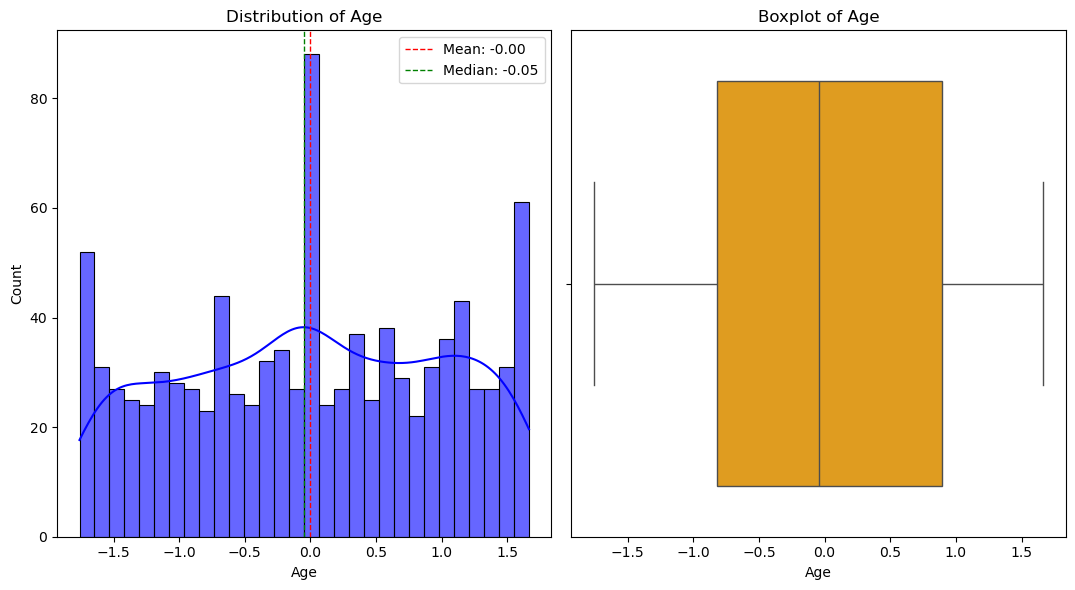

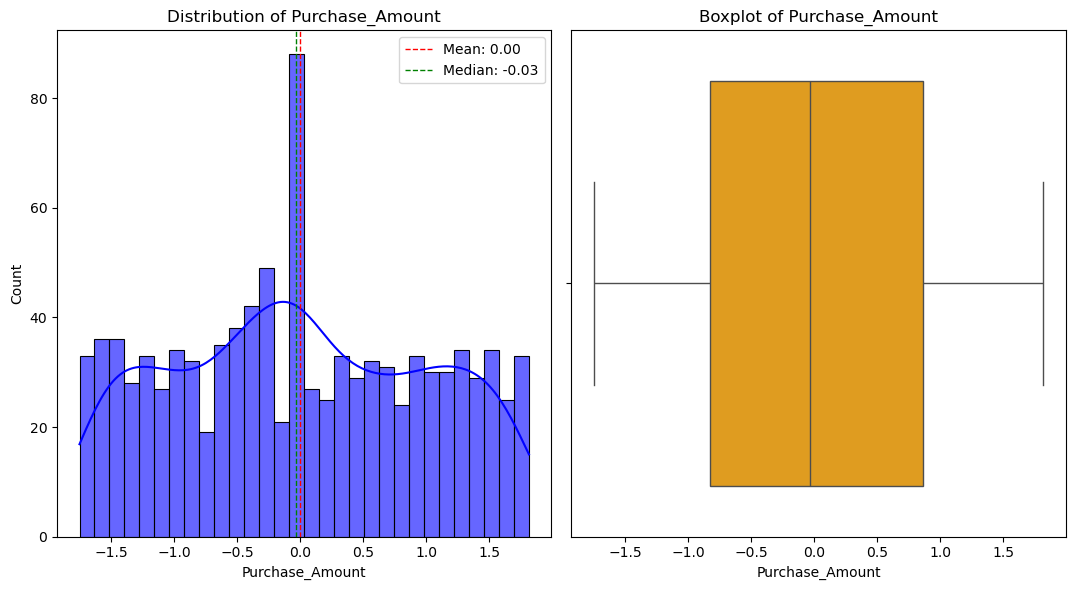

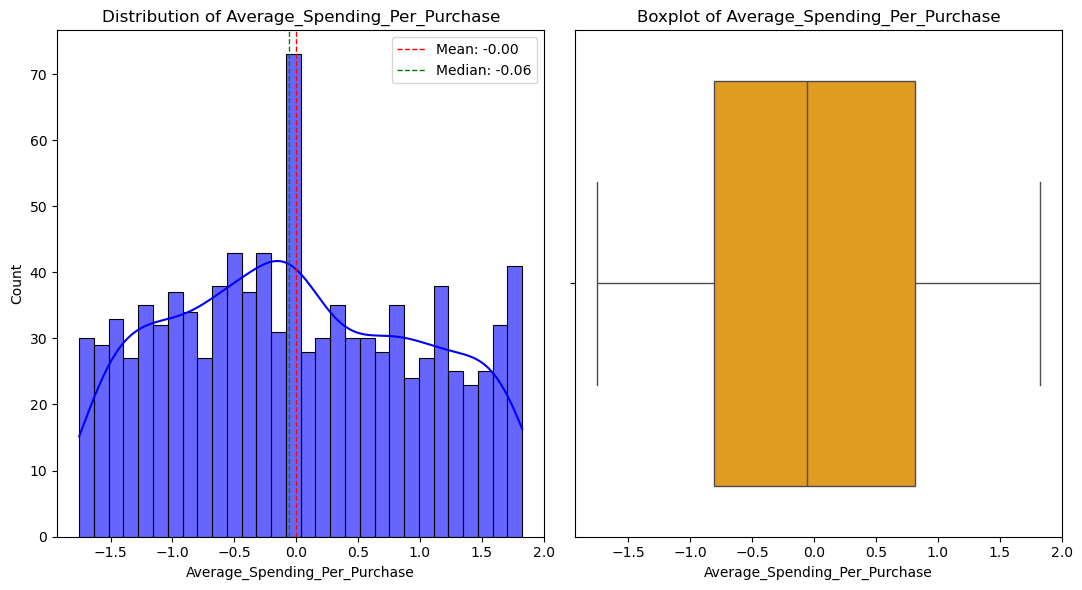

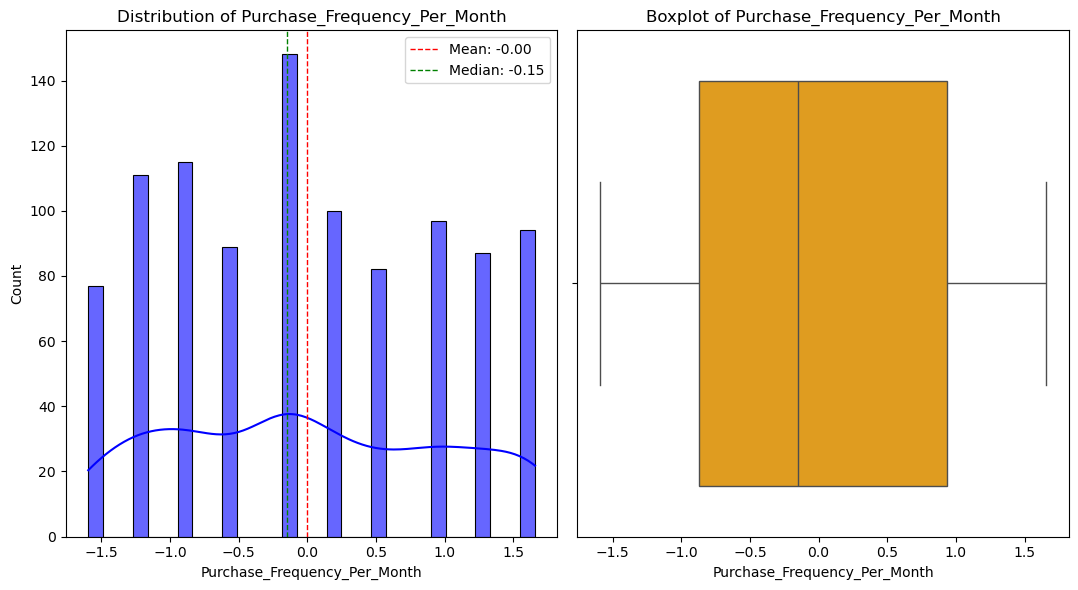

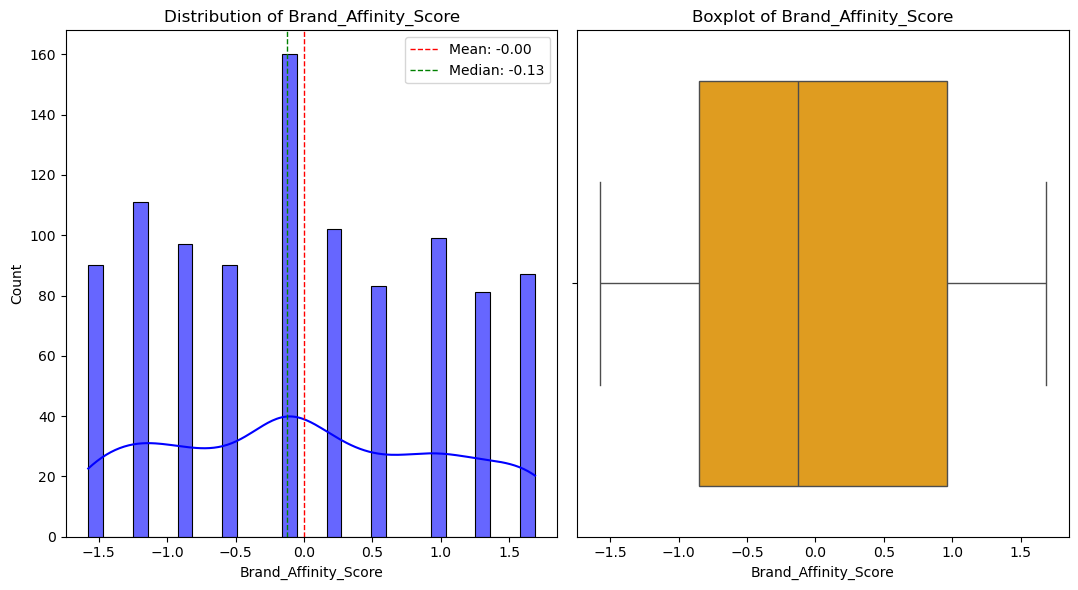

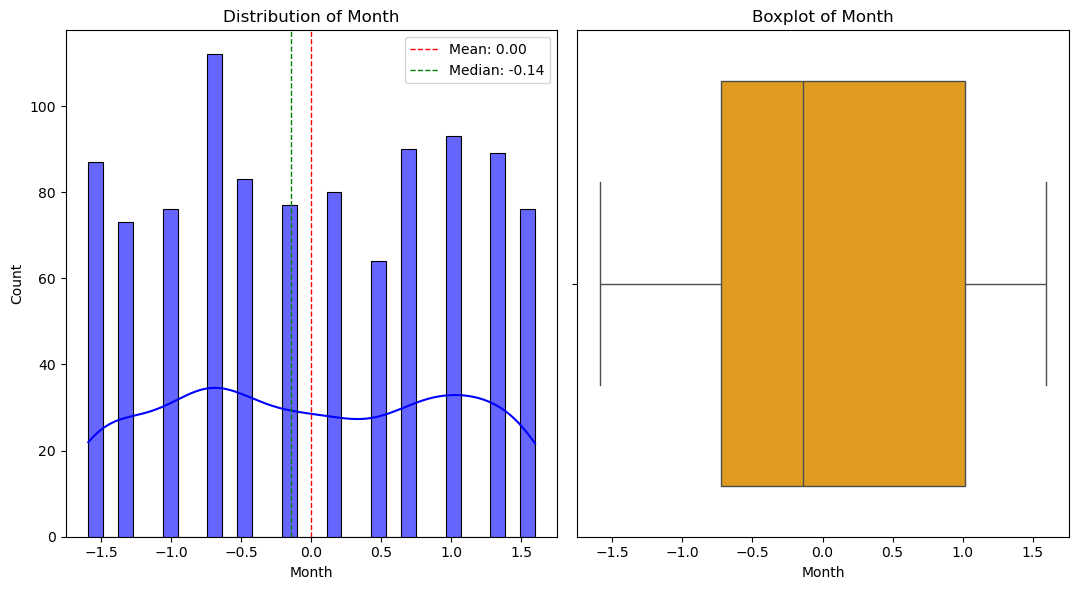

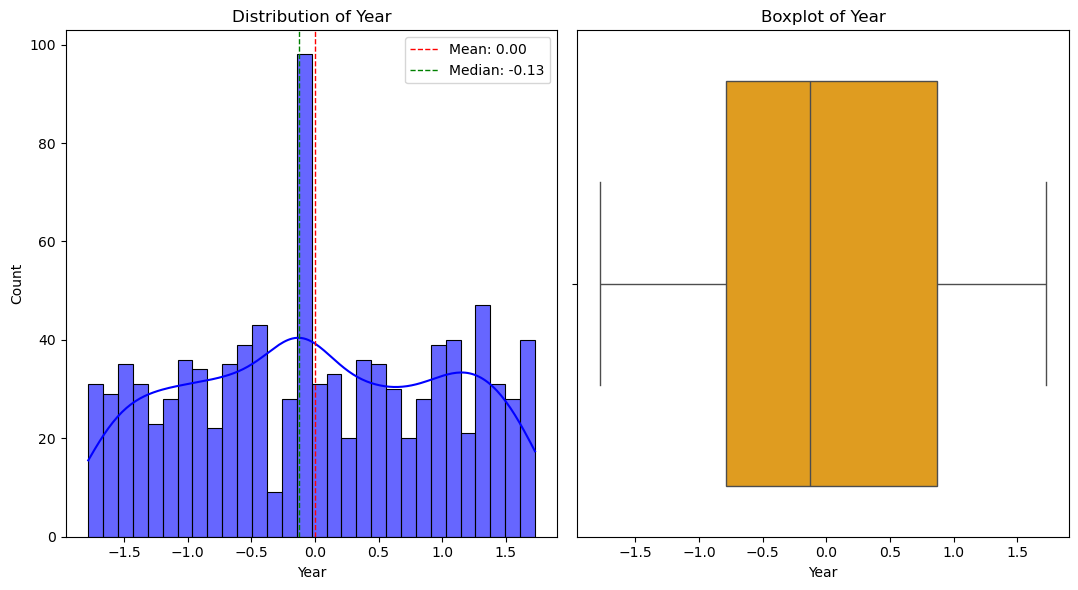

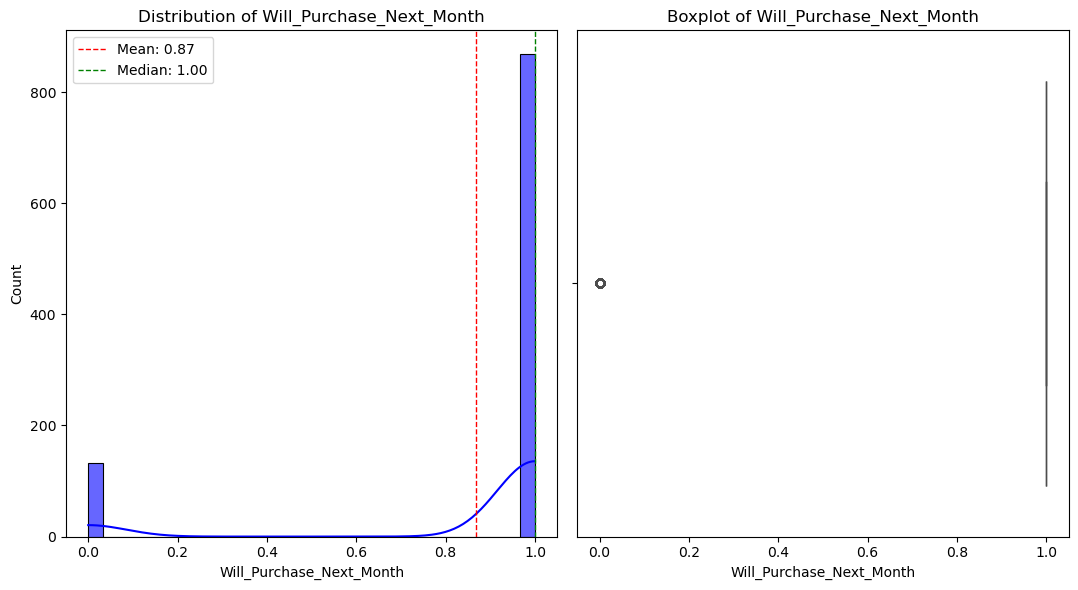

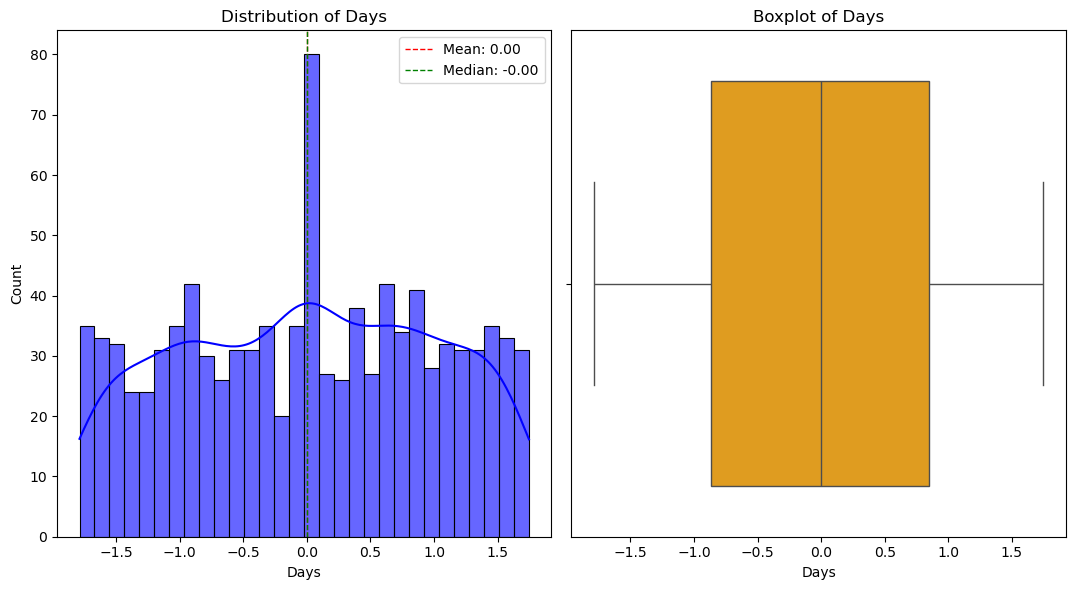

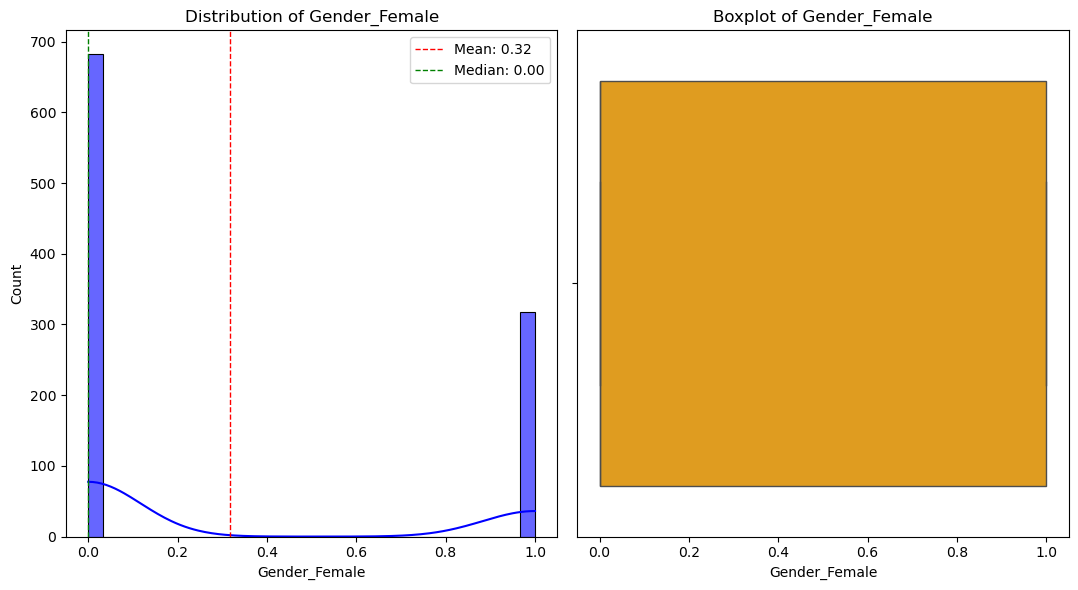

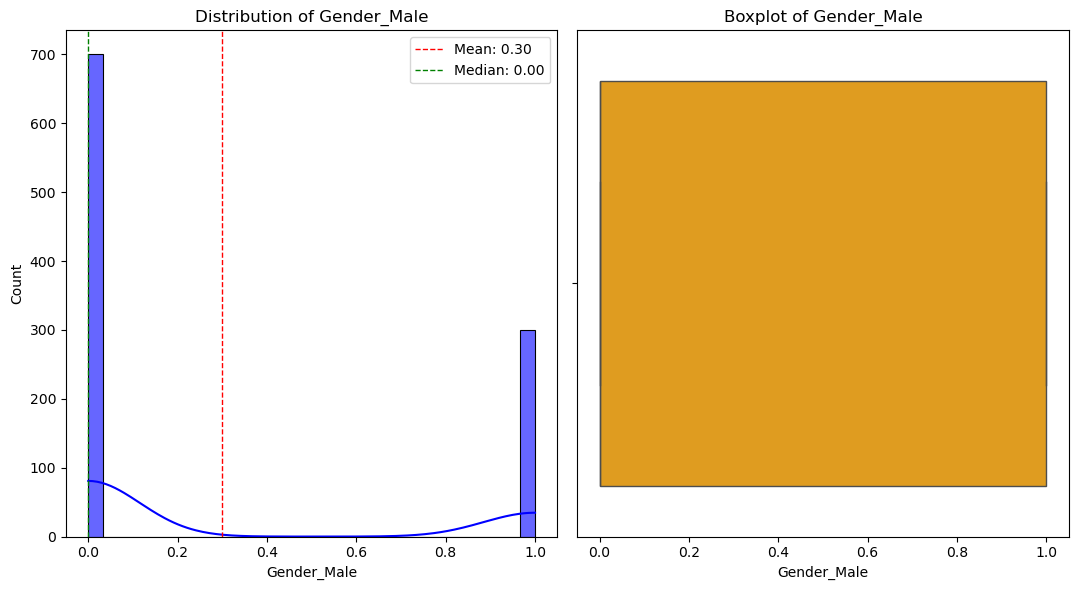

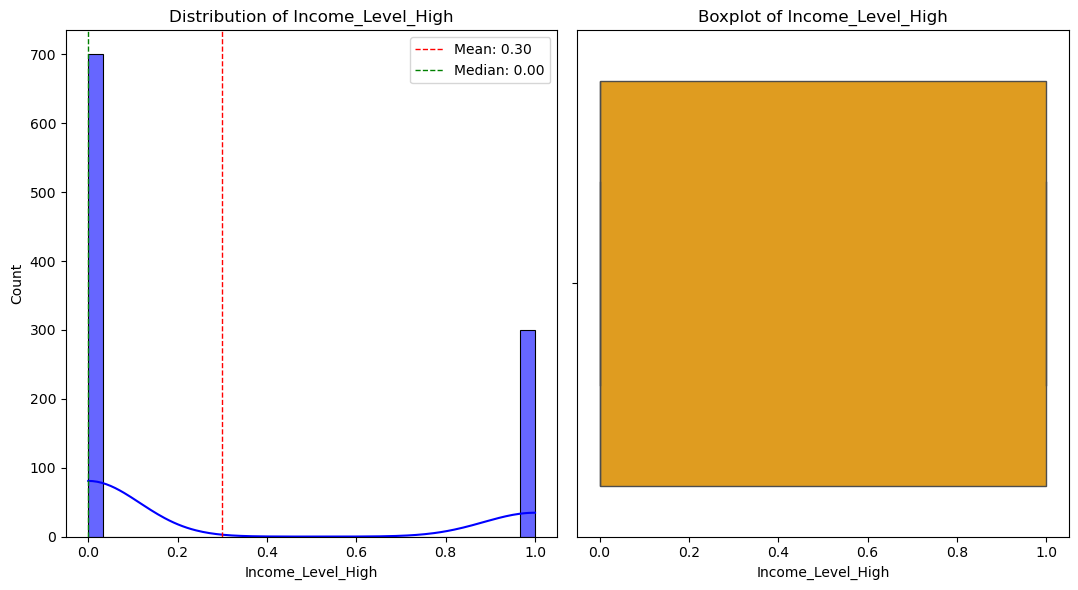

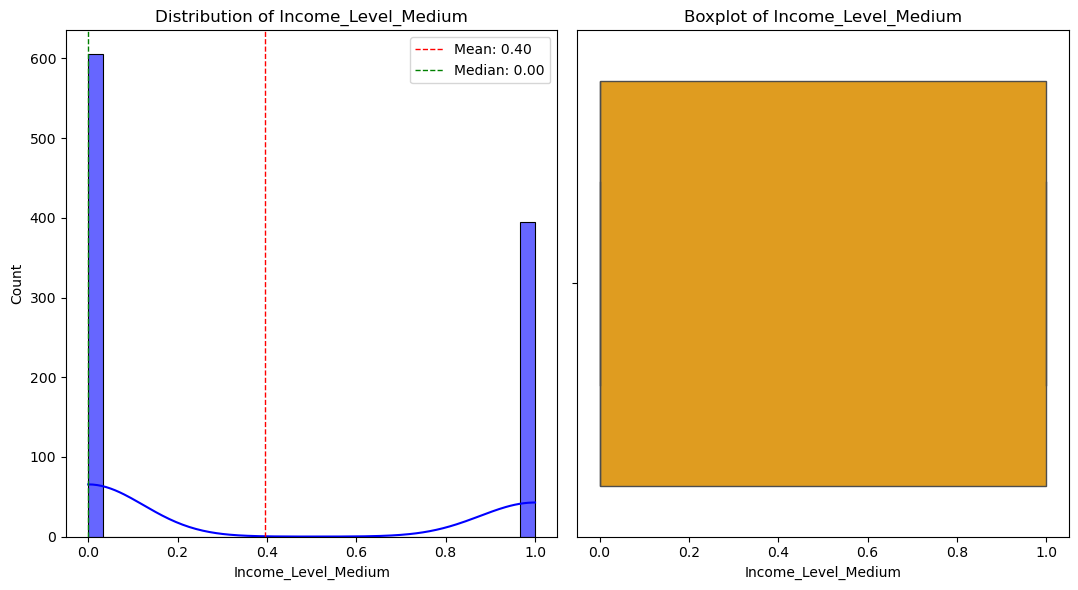

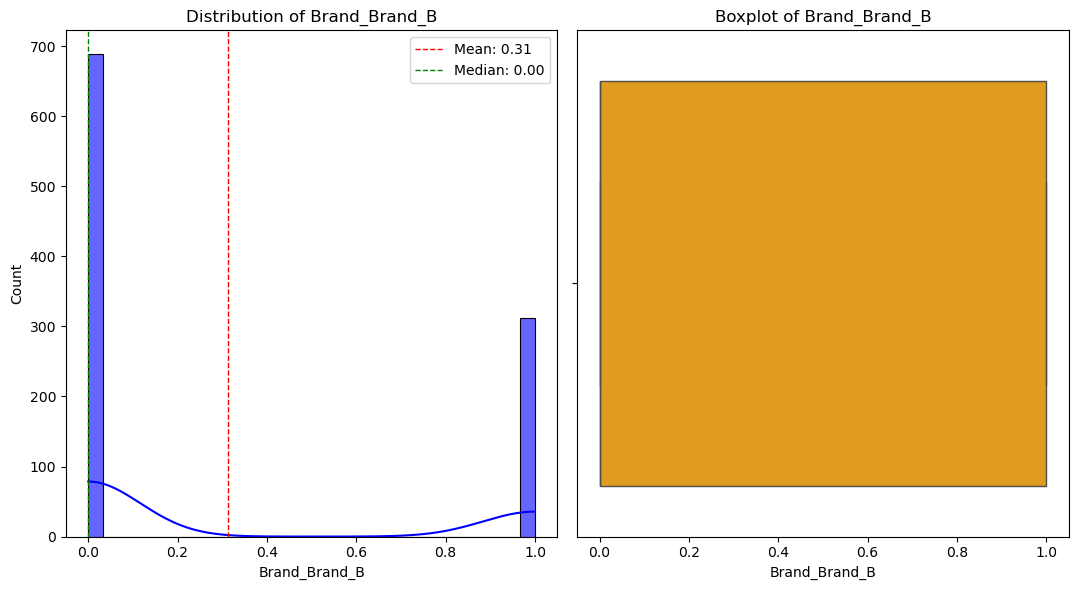

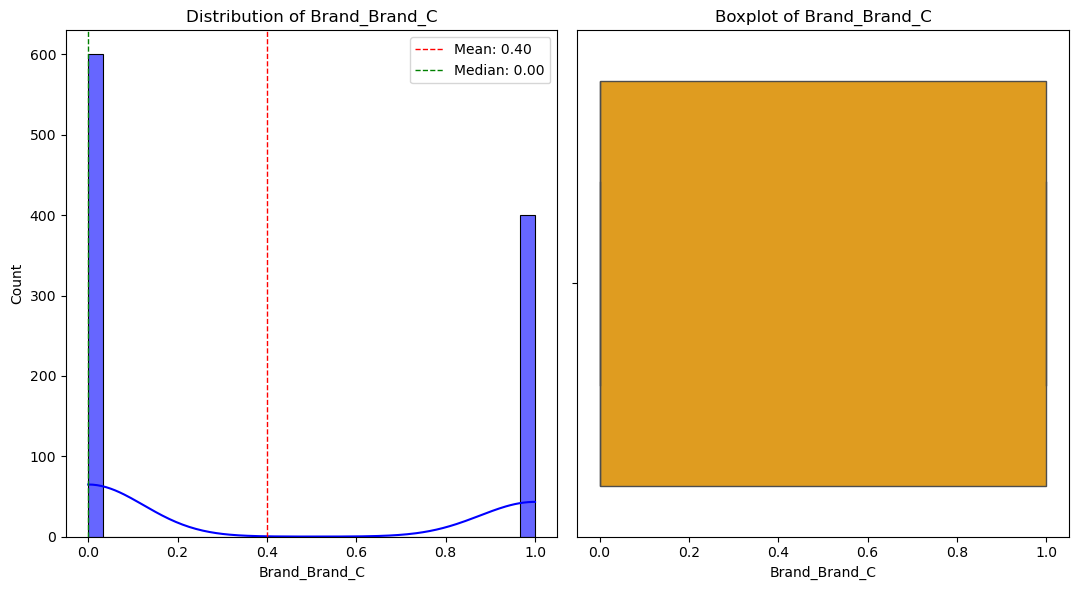

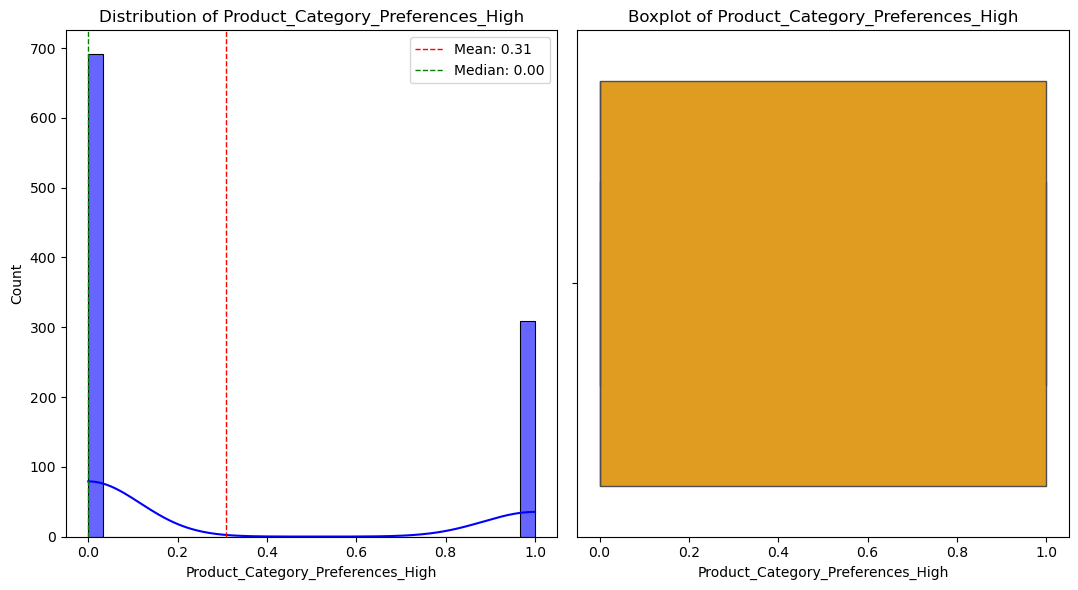

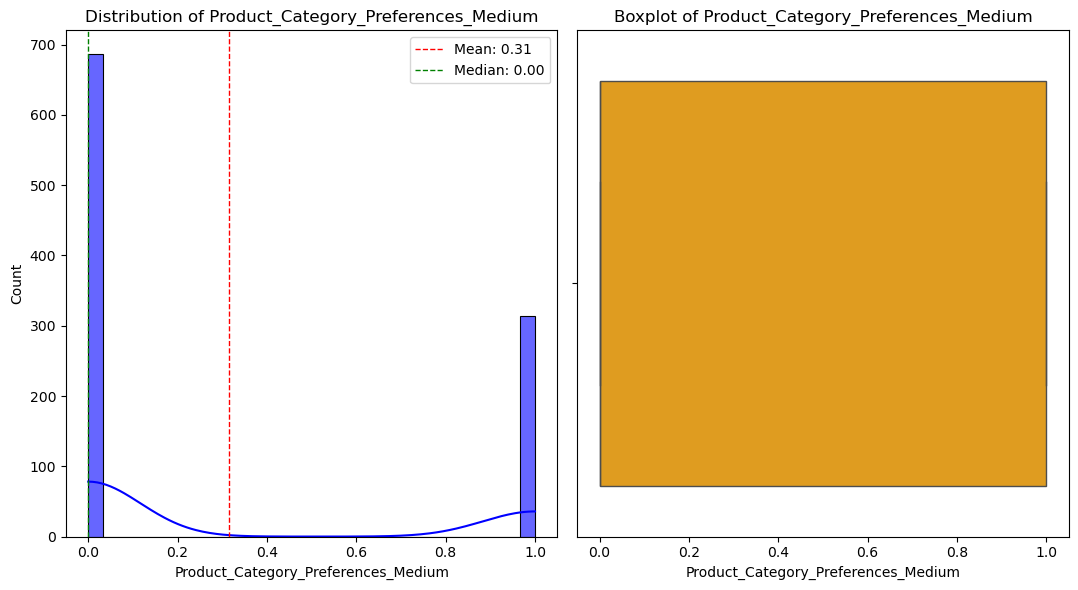

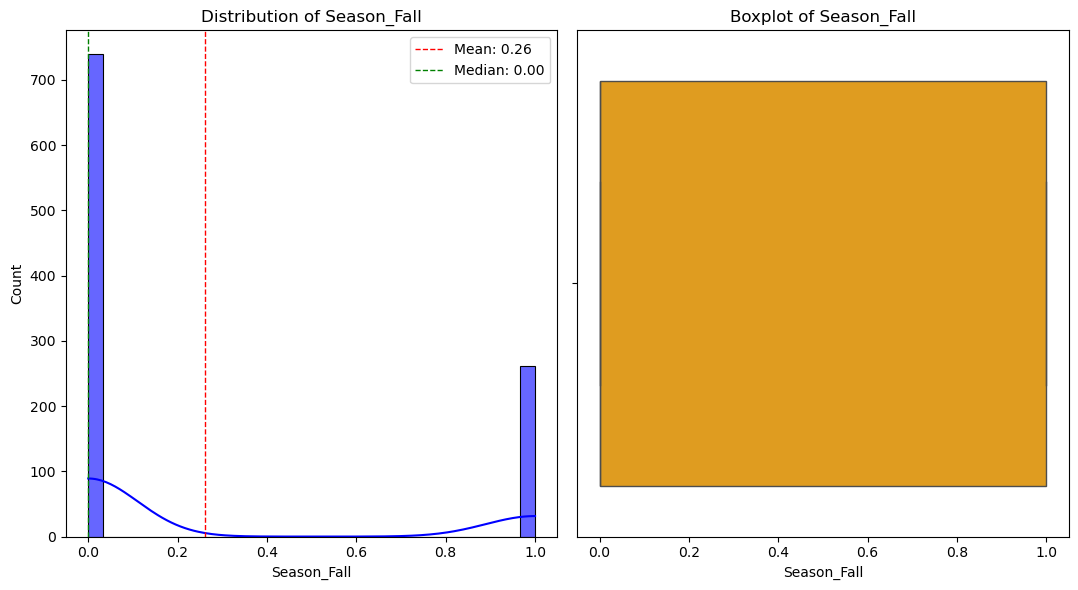

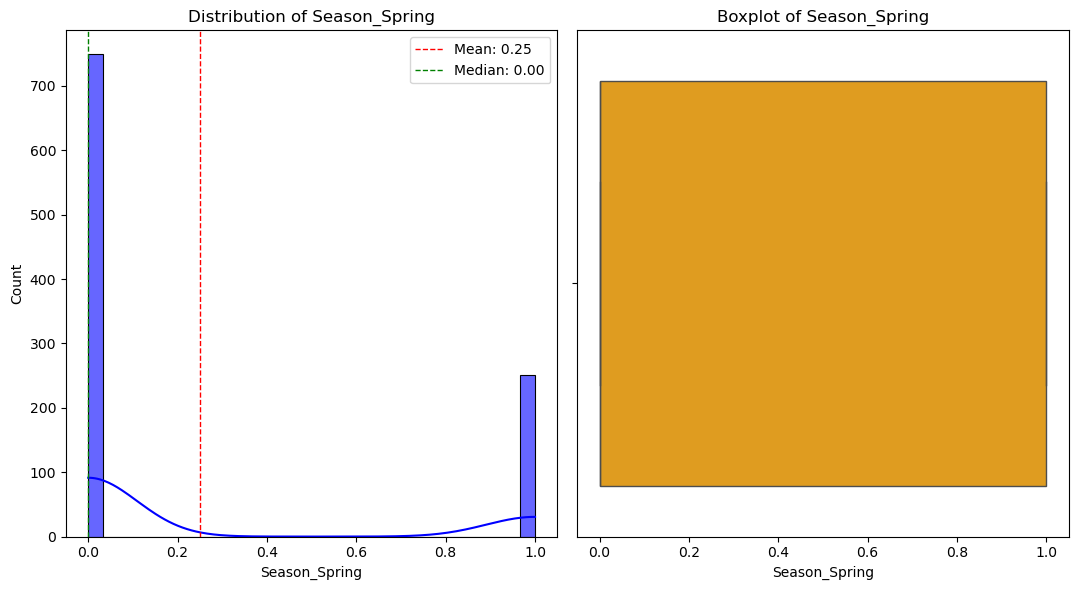

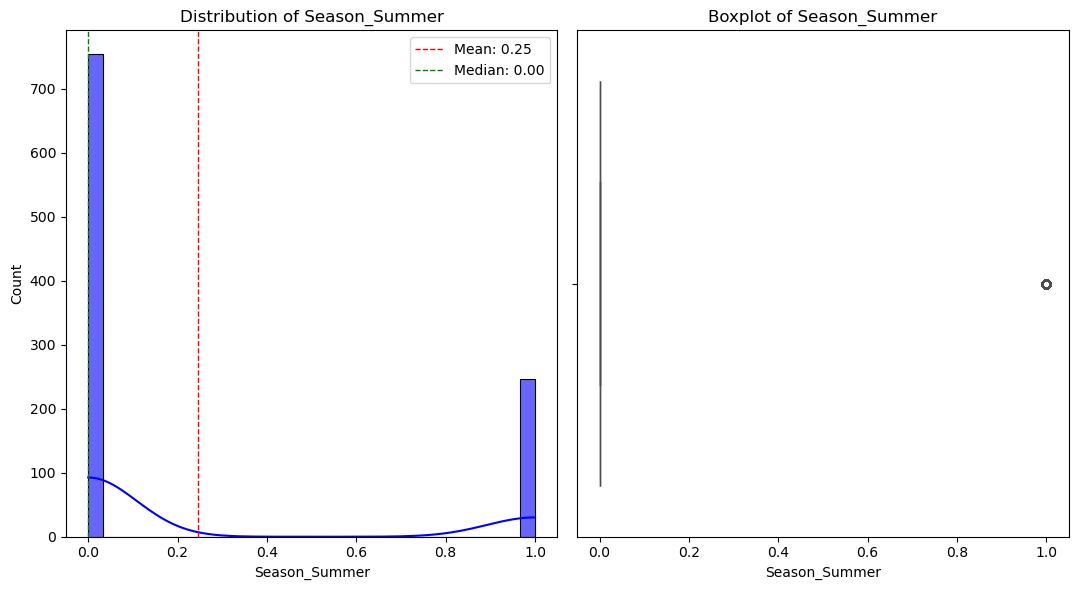

In [48]:
numeric_columns = Scaled_df.select_dtypes(include=['number']).columns
int_cols_plot(Scaled_df, numeric_columns)

In [49]:
Scaled_df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,Days,Gender_Female,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,-8.171241e-17,5.506706e-17,-5.284662e-17,-1.136868e-16,-1.687539e-16,6.039613e-17,2.774669e-15,0.86800,1.382228e-13,0.318000,0.300000,0.300000,0.395000,0.312000,0.400000,0.309000,0.314000,0.2610,0.251000,0.246000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.33866,1.000500e+00,0.465932,0.458487,0.458487,0.489095,0.463542,0.490143,0.462312,0.464349,0.4394,0.433805,0.430894
min,-1.759643e+00,-1.749021e+00,-1.753195e+00,-1.595270e+00,-1.577592e+00,-1.590255e+00,-1.781234e+00,0.00000,-1.788023e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,-8.204301e-01,-8.250490e-01,-8.114068e-01,-8.722834e-01,-8.517617e-01,-7.211047e-01,-7.878333e-01,1.00000,-8.653354e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,-4.696065e-02,-3.203346e-02,-5.797647e-02,-1.492967e-01,-1.259315e-01,-1.416714e-01,-1.255659e-01,1.00000,-2.016061e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
75%,8.922523e-01,8.628373e-01,8.178863e-01,9.351832e-01,9.628137e-01,1.017195e+00,8.678352e-01,1.00000,8.464611e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,0.000000
max,1.665722e+00,1.815911e+00,1.825599e+00,1.658170e+00,1.688644e+00,1.596628e+00,1.728783e+00,1.00000,1.746886e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


## **Module 2: Exploratory Data Analysis (EDA):**

### 1. Univariate Analysis:

o Analyze the distribution of key features like customer age, purchase amount,
and purchase frequency using histograms, boxplots, and descriptive statistics.

o Identify potential skewness or outliers in the data.

### 2. Bivariate Analysis:

o Utilize scatterplots and heatmaps to explore relationships between different
features, such as purchase amount vs. income level, brand affinity vs. product
category, and purchase frequency vs. age.

o Investigate the presence of correlations and identify any impactful
relationships.

### 3. Temporal Analysis:

o Analyse trends in customer behaviour over time, including changes in
purchase frequency, average spending, and product preferences.

o Identify seasonal variations or any significant shifts in customer behavior
patterns.

## **Module 3: Regression and Decision Tree Analysis:**

### **A. Linear Regression Analysis:**

### 1. Problem Definition:

• Predict the average spending per purchase based on customer demographics and
purchase history.

In [64]:
MLRM_df

,Age,Purchase_Date,Product_Category,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,...,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
0,-0.544191,2022-04-26,Clothing,-0.417628,0.281067,-1.233777,-1.214677,-1.590255,0.867835,1,...,0,0,1,0,1,0,0,0,0,0
1,-1.372908,2021-08-10,Books,0.491793,0.959155,-1.233777,-1.577592,0.437762,-0.522926,1,...,1,1,0,0,0,0,0,1,0,0
2,0.395022,2021-12-09,Electronics,-0.388527,1.825599,1.296677,-1.577592,-1.590255,-0.125566,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.654687,2022-12-03,Clothing,0.084372,1.712585,-0.872283,-0.488847,0.727478,1.000289,1,...,0,0,1,0,1,0,0,1,0,0
4,1.002748,2020-06-08,Books,1.299360,1.260527,0.573690,-1.214677,-1.590255,0.867835,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.113244,2023-03-17,Electronics,-0.512208,1.524227,-1.233777,-0.125932,-0.431388,-0.655380,1,...,1,0,1,0,1,0,1,1,0,0
996,1.555226,2023-08-30,Books,-0.541310,0.055038,-0.872283,-0.851762,0.727478,-1.317647,1,...,0,0,0,1,0,0,1,0,0,0
997,0.726509,2023-03-01,NaN,-0.279396,1.787928,-1.233777,1.325729,1.596628,-0.125566,1,...,1,1,0,0,1,0,0,0,0,1
998,-0.378448,2021-05-13,Clothing,-0.032033,1.750256,0.935183,0.599899,-1.010821,0.205568,1,...,1,1,0,0,1,0,0,0,1,0


In [65]:
df_encoded

,Age,Purchase_Date,Product_Category,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Will_Purchase_Next_Month,...,Gender_Male,Income_Level_High,Income_Level_Medium,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Medium,Season_Fall,Season_Spring,Season_Summer
0,40,2022-04-26,Clothing,193,59,2,2,1,2010,1,...,0,0,1,0,1,0,0,0,0,0
1,25,2021-08-10,Books,318,77,2,1,8,1989,1,...,1,1,0,0,0,0,0,1,0,0
2,57,2021-12-09,Electronics,197,100,9,1,1,1995,1,...,0,0,0,0,0,0,0,0,0,0
3,38,2022-12-03,Clothing,262,97,3,4,9,2012,1,...,0,0,1,0,1,0,0,1,0,0
4,68,2020-06-08,Books,429,85,7,2,1,2010,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,2023-03-17,Electronics,180,92,2,5,5,1987,1,...,1,0,1,0,1,0,1,1,0,0
996,78,2023-08-30,Books,176,53,3,3,9,1977,1,...,0,0,0,1,0,0,1,0,0,0
997,63,2023-03-01,NaN,212,99,2,9,12,1995,1,...,1,1,0,0,1,0,0,0,0,1
998,43,2021-05-13,Clothing,246,98,8,7,3,2000,1,...,1,1,0,0,1,0,0,0,1,0


In [66]:
# Assuming df is your DataFrame and X_columns is the list of column names
def calculate_vif(df, X_columns):
    """
    Calculate the Variance Inflation Factor (VIF) for a list of predictor variables.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the variables.
        X_columns (list): The list of column names to calculate VIF for.
    
    Returns:
        pd.DataFrame: A DataFrame with variables and their corresponding VIF scores.
    """
    # Creating a new DataFrame with only the selected columns
    X = df[X_columns]
    
    # Adding a constant column to the predictors to account for the intercept
    X = sm.add_constant(X)
    
    # Calculating VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Dropping the constant column from the result
    return vif_data[vif_data["Variable"] != "const"]

In [67]:
# Example usage
import statsmodels.api as sm

vif_result = calculate_vif(MLRM_df, ['Age', 'Gender_Female', 'Gender_Male',
             'Income_Level_High', 'Income_Level_Medium',
             'Purchase_Amount', 'Purchase_Frequency_Per_Month', 
             'Product_Category_Preferences_High', 
             'Product_Category_Preferences_Medium'
            ])
print(vif_result)

                              Variable       VIF
1                                  Age  1.008227
2                        Gender_Female  1.259987
3                          Gender_Male  1.263930
4                    Income_Level_High  1.394273
5                  Income_Level_Medium  1.393352
6                      Purchase_Amount  1.006993
7         Purchase_Frequency_Per_Month  1.005668
8    Product_Category_Preferences_High  1.261525
9  Product_Category_Preferences_Medium  1.268554


In [103]:
X = MLRM_df[['Age', 'Gender_Female', 'Gender_Male',
             'Income_Level_High', 'Income_Level_Medium',
             'Purchase_Amount', 'Purchase_Frequency_Per_Month',
             'Product_Category_Preferences_High',
             'Product_Category_Preferences_Medium'
            ]]

X = MLRM_df[["Age", "Purchase_Frequency_Per_Month", "Income_Level_High", "Income_Level_Medium","Gender_Female","Gender_Male"] +
         [col for col in MLRM_df.columns if col.startswith("Product_Category_") and col != 'Product_Category_Preferences']]

y = MLRM_df['Average_Spending_Per_Purchase']

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Mean Absolute Error (to assess model performance)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R^2 Score: -0.00025920938164381013
Mean Absolute Error: 0.8563111699716912


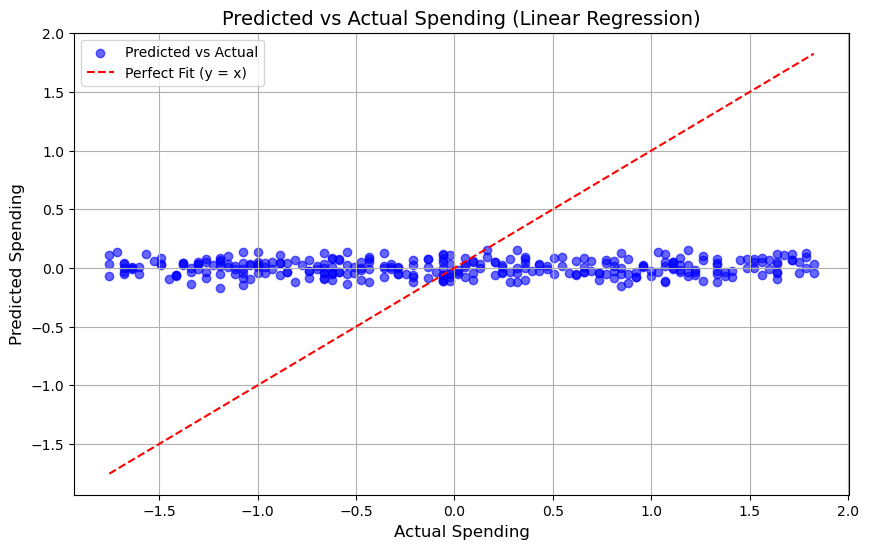

In [69]:
# Plotting predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit (y = x)')

# Customize the plot
plt.title('Predicted vs Actual Spending (Linear Regression)', fontsize=14)
plt.xlabel('Actual Spending', fontsize=12)
plt.ylabel('Predicted Spending', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from scipy import stats

def validate_mlr_assumptions(df, independent_vars, dependent_var):
    """
    Validates the assumptions of Multiple Linear Regression Model (MLRM).
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - independent_vars: list of strings representing independent variable column names.
    - dependent_var: string representing the dependent variable column name.
    
    Assumptions checked:
    1. Linearity
    2. Homoscedasticity
    3. Independence of Errors
    4. Multicollinearity
    """
    # Define independent (X) and dependent (y) variables
    X = df[independent_vars]
    y = df[dependent_var]

    # Add constant to the model (for intercept)
    X = sm.add_constant(X)

    # 1. Linearity: Check linearity by visualizing residuals vs. fitted values
    model = sm.OLS(y, X).fit()
    y_pred = model.fittedvalues
    residuals = model.resid

    plt.figure(figsize=(12, 6))

    # Plot: Residuals vs Fitted
    plt.subplot(121)
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    
    # Plot: Q-Q plot for normality of residuals
    plt.subplot(122)
    sm.qqplot(residuals, line ='45', ax=plt.gca())
    plt.title('Q-Q plot for residuals')
    
    plt.tight_layout()
    plt.show()

    # 2. Homoscedasticity: Check if residuals have constant variance
    # If residuals increase or decrease systematically with fitted values, heteroscedasticity may be present.
    plt.figure(figsize=(6, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals vs Fitted (Homoscedasticity Check)')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()

    # 3. Independence of errors: Check Durbin-Watson statistic
    dw_stat = sm.stats.durbin_watson(residuals)
    print(f"Durbin-Watson Statistic: {dw_stat:.4f}")
    # Durbin-Watson statistic should be between 1.5 and 2.5 for independence of errors.
    if dw_stat < 1.5 or dw_stat > 2.5:
        print("Warning: Durbin-Watson statistic suggests potential autocorrelation in residuals.")

    # 4. Multicollinearity: Check Variance Inflation Factor (VIF)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVariance Inflation Factor (VIF) for each feature:")
    print(vif_data)

    # High VIF (>10) indicates multicollinearity problems

    # 5. Check for Normality of residuals (Shapiro-Wilk test)
    stat, p_value = stats.shapiro(residuals)
    print(f"\nShapiro-Wilk Test for normality: stat={stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print("Warning: Residuals do not follow a normal distribution.")
    
    # Return model summary for further details
    print(model.summary())

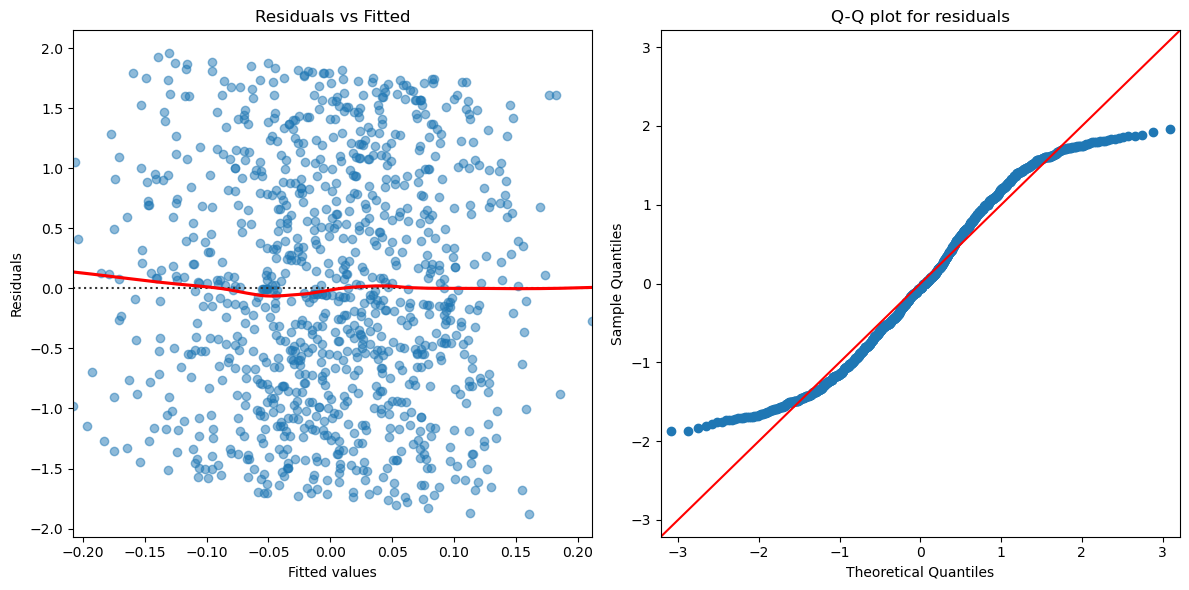

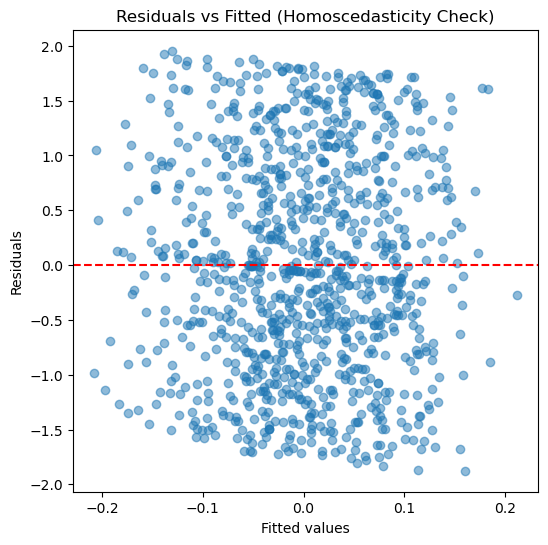

Durbin-Watson Statistic: 1.9867

Variance Inflation Factor (VIF) for each feature:
                               feature       VIF
0                                const  1.000000
1                                  Age  1.008227
2                        Gender_Female  1.259987
3                          Gender_Male  1.263930
4                    Income_Level_High  1.394273
5                  Income_Level_Medium  1.393352
6                      Purchase_Amount  1.006993
7         Purchase_Frequency_Per_Month  1.005668
8    Product_Category_Preferences_High  1.261525
9  Product_Category_Preferences_Medium  1.268554

Shapiro-Wilk Test for normality: stat=0.9663, p-value=0.0000
                                  OLS Regression Results                                 
Dep. Variable:     Average_Spending_Per_Purchase   R-squared:                       0.006
Model:                                       OLS   Adj. R-squared:                 -0.003
Method:                            Least Squar

In [107]:
validate_mlr_assumptions(MLRM_df, ['Age', 'Gender_Female', 'Gender_Male',
             'Income_Level_High', 'Income_Level_Medium',
             'Purchase_Amount', 'Purchase_Frequency_Per_Month',
             'Product_Category_Preferences_High',
             'Product_Category_Preferences_Medium'
            ], ['Average_Spending_Per_Purchase'])

### 2. Model Building:

• Preprocess the data by selecting relevant numerical and categorical variables (e.g.,
income level, product category, age).

• Split the dataset into training and testing sets.

### 3. Implementation:

• Train a linear regression model using the training data.

• Evaluate the model using metrics such as Mean Absolute Error (MAE), Mean
Squared Error (MSE), and R-squared.

### 4. Visualization:

• Plot the predicted vs. actual values for the test dataset.

• Include regression lines for better interpretability.

### **B. Decision Tree Analysis:**

### 1. Problem Definition:

• Classify whether a customer will make a purchase in the next month (use a binary
target variable).

### 2. Model Building:

• Engineer a binary target variable (e.g., 1 = purchase made, 0 = no purchase).

• Use features like purchase frequency, spending history, and product preferences.

### 3. Implementation:

• Train a decision tree classifier and use criteria such as Gini Impurity or
Entropy.

In [89]:
X = df_encoded[['Purchase_Frequency_Per_Month', 'Average_Spending_Per_Purchase', 
                'Purchase_Amount', 'Product_Category_Preferences_High',
                'Product_Category_Preferences_Medium',
                'Brand_Affinity_Score', 'Age', 
                'Season_Fall', 'Season_Summer']]

y = df_encoded['Will_Purchase_Next_Month']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

• Evaluate the model using metrics such as Accuracy, Precision, Recall, and F1
Score.

In [91]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Accuracy: 0.9266666666666666
Precision: 0.9501915708812261
Recall: 0.9649805447470817
F1 Score: 0.9575289575289575

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73        43
           1       0.95      0.96      0.96       257

    accuracy                           0.93       300
   macro avg       0.86      0.83      0.84       300
weighted avg       0.92      0.93      0.93       300


Feature Importance:
                                Feature  Importance
0         Purchase_Frequency_Per_Month    0.700144
6                                  Age    0.075680
2                      Purchase_Amount    0.075258
1        Average_Spending_Per_Purchase    0.074767
5                 Brand_Affinity_Score    0.031781
3    Product_Category_Preferences_High    0.022711
4  Product_Category_Preferences_Medium    0.010939
7                          Season_Fall    0.004429
8                        Season_Summer    0.004291


### 4. Visualization:

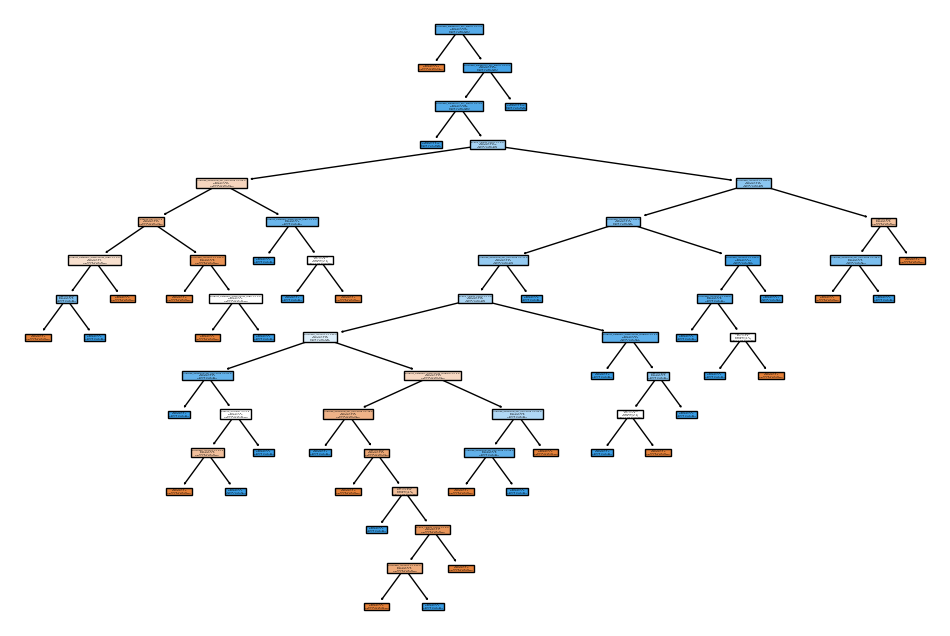

In [93]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()

• Plot the decision tree.

• Highlight important features that influence the decision.

## **Module 4: Clustering Analysis:**

(Hint: Remove the predicted label and then apply K-Means Clustering)

In [98]:
X = KMeans_df.drop(columns=['Will_Purchase_Next_Month', 'Purchase_Date'])

### 1. Define the number of clusters(k):

In [100]:
inertia = []
range_k = range(1, 15)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

inertia_diff = np.diff(inertia)
inertia_second_diff = np.diff(inertia_diff)

# Find the index where the second derivative is maximum (this corresponds to the elbow)
optimal_k = np.argmin(inertia_second_diff) + 2


plt.figure(figsize=(8, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

print(f"The optimal number of clusters (k) is: {optimal_k}")
print(inertia)

ValueError: could not convert string to float: 'Clothing'

• Analyze the elbow plot to determine the optimal number of clusters based on the
sum of squared distances within each other.

### 2. Apply K-Means Clustering:

In [ ]:
optimal_k = 8

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
df_encoded['Cluster'] = clusters

# Display the cluster centers (mean of each feature for each cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers (mean of features per cluster):")
cluster_centers

• Implement K-means with the chosen k value to segment customers into distinct
clusters based on their purchase behavior and preferences.

### 3. Analyze cluster characteristics:

In [ ]:
cluster_analysis = df_encoded.groupby('Cluster').agg({
    'Purchase_Amount': 'mean',
    'Average_Spending_Per_Purchase': 'mean',
    'Purchase_Frequency_Per_Month': 'mean',
    'Brand_Affinity_Score': 'mean',
    'Product_Category_Preferences_High': 'mean',
    'Product_Category_Preferences_Medium': 'mean',
    'Season_Fall': 'mean',
    'Season_Summer': 'mean',
}).reset_index()

print("Cluster Characteristics:")
cluster_analysis 

• Investigate key features of each cluster, such as average purchase amount, brand
affinity and product category preferences.

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters (Projected in 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


• Identify significant differences and similarities between clusters.

## **Module 5: Comparison and Conclusion:**

### 1. Compare the predictive performance of the regression,decision tree and K-Means
Clustering models.

• Discuss strengths, limitations, and real-world applicability in the context of
customer behavior analysis.

### 2. Provide actionable recommendations for the electronics section based on the results.